In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",50)
plt.rcParams["figure.figsize"]=[10,8]

%matplotlib inline

In [2]:
train=pd.read_csv(r"C:\Users\kaish\Downloads\titanic\train.csv")
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
test=pd.read_csv(r"C:\Users\kaish\Downloads\titanic\test.csv")
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

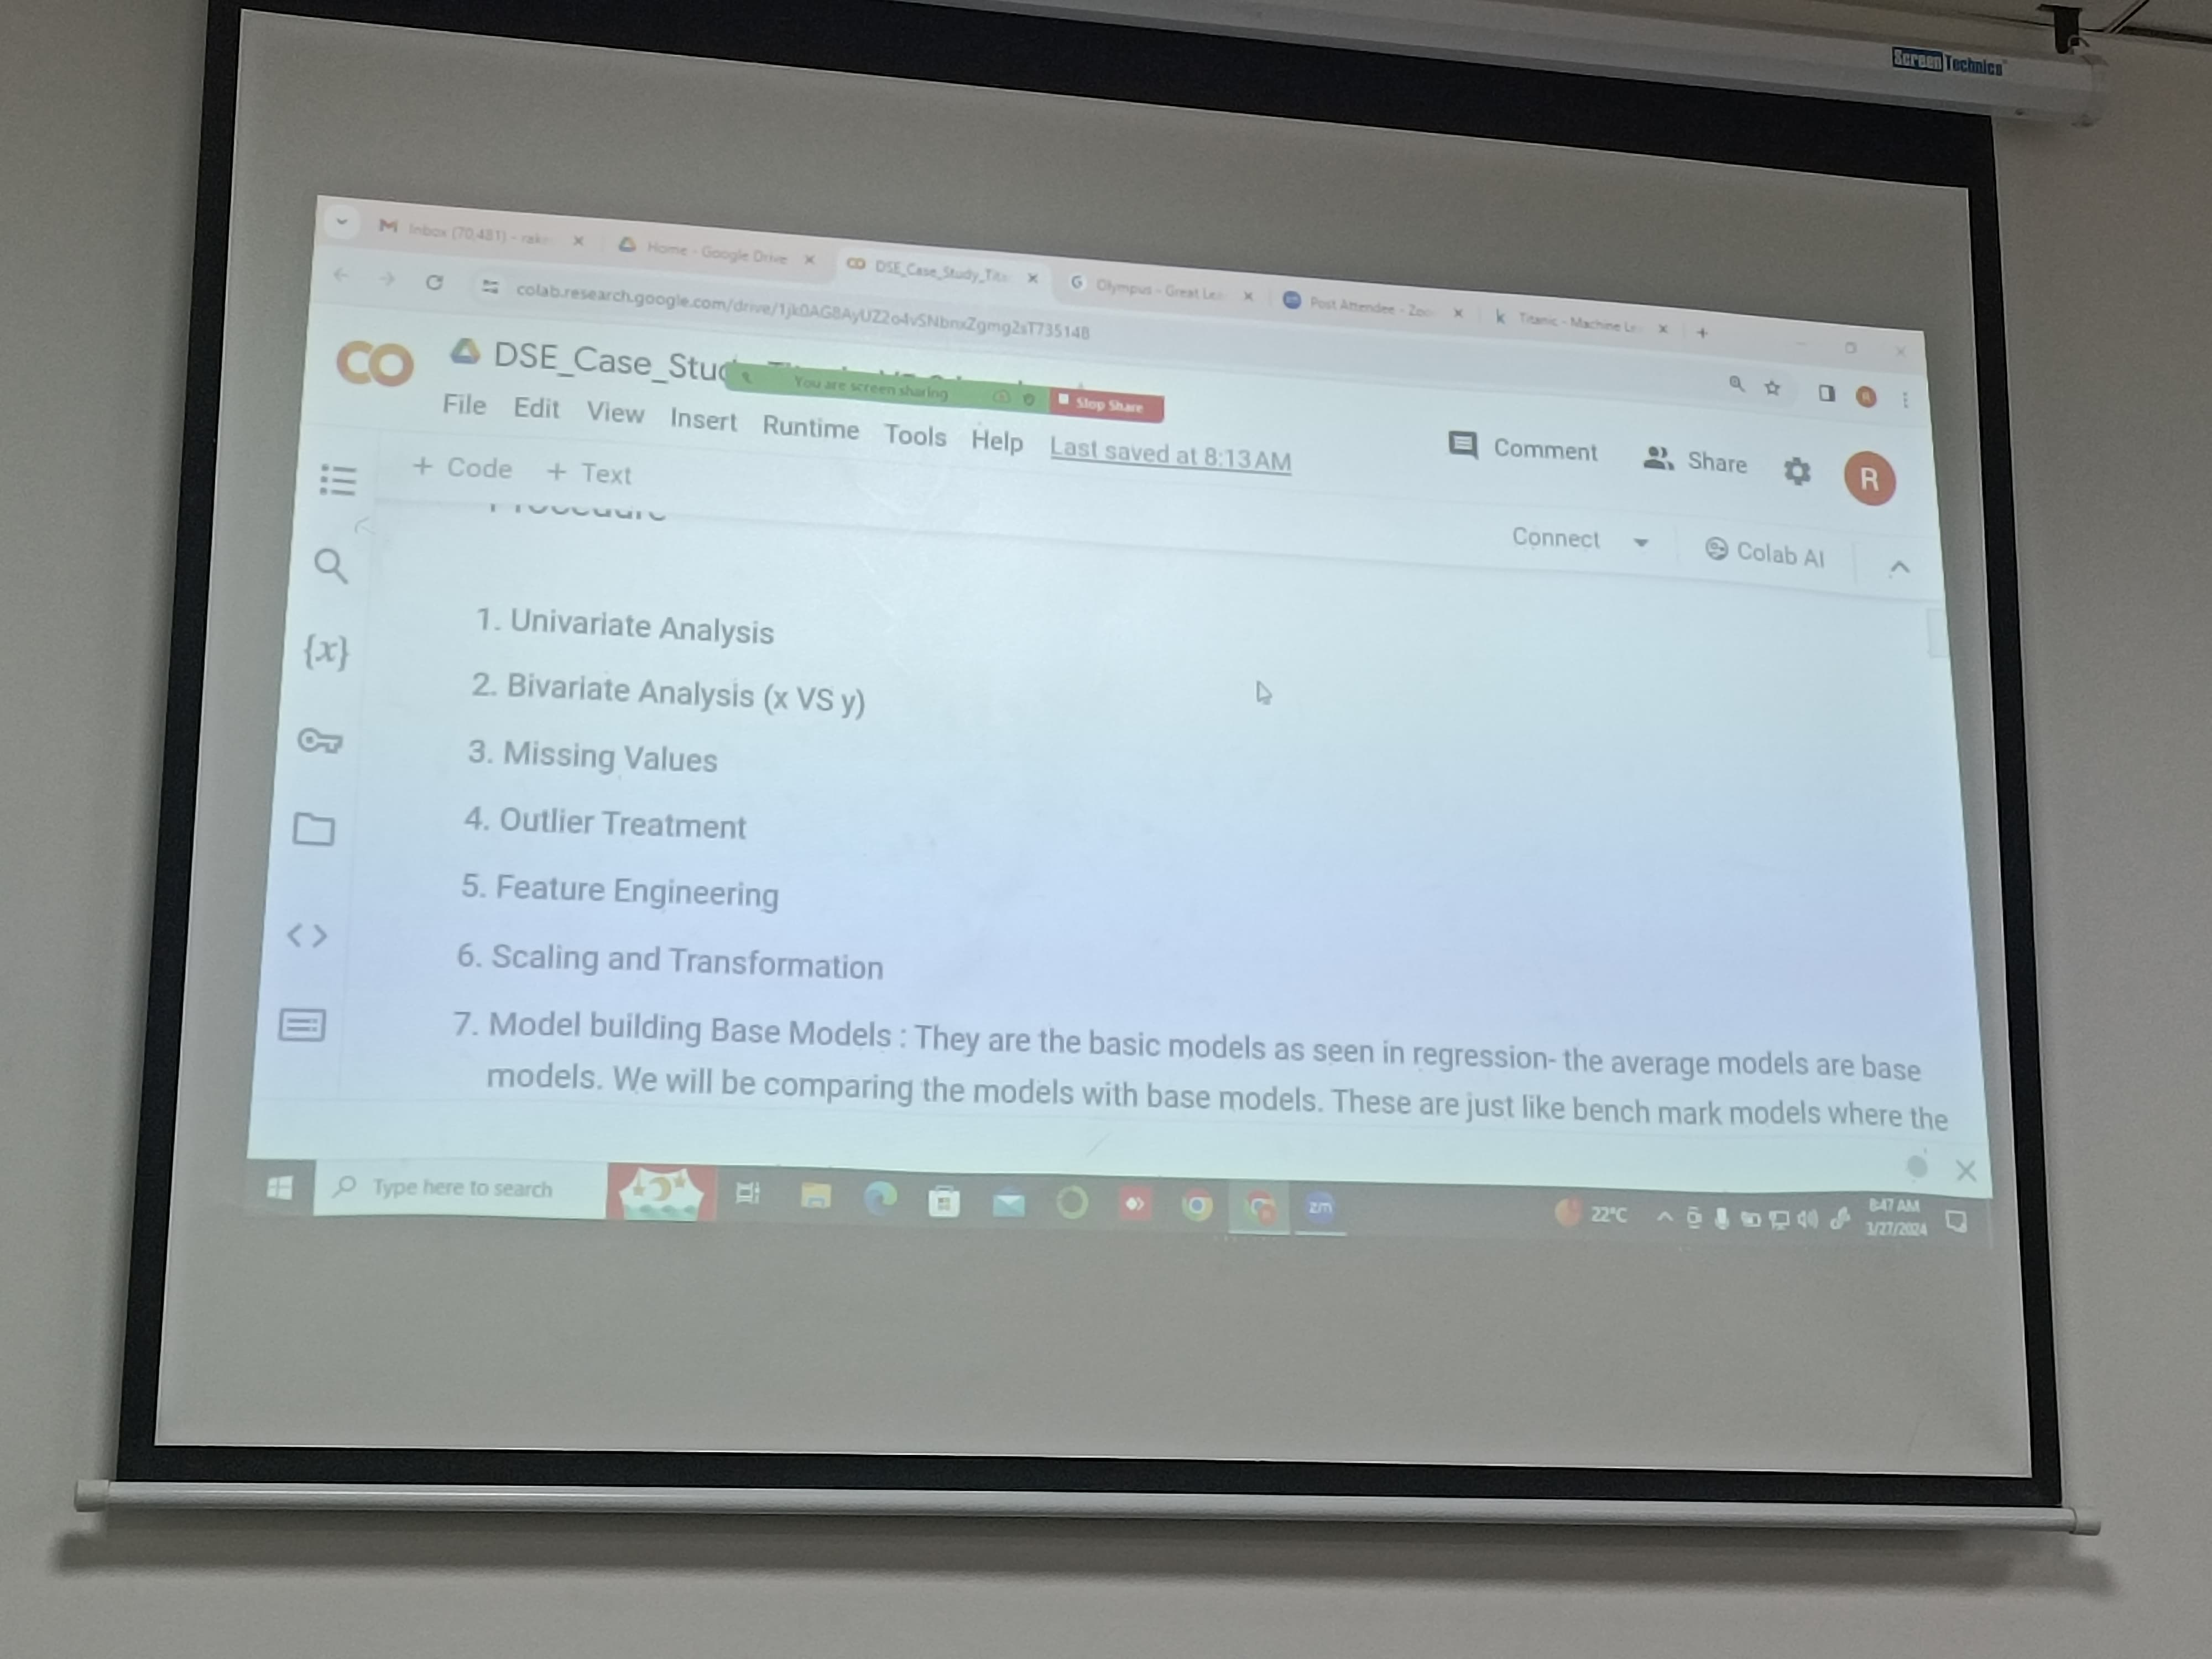

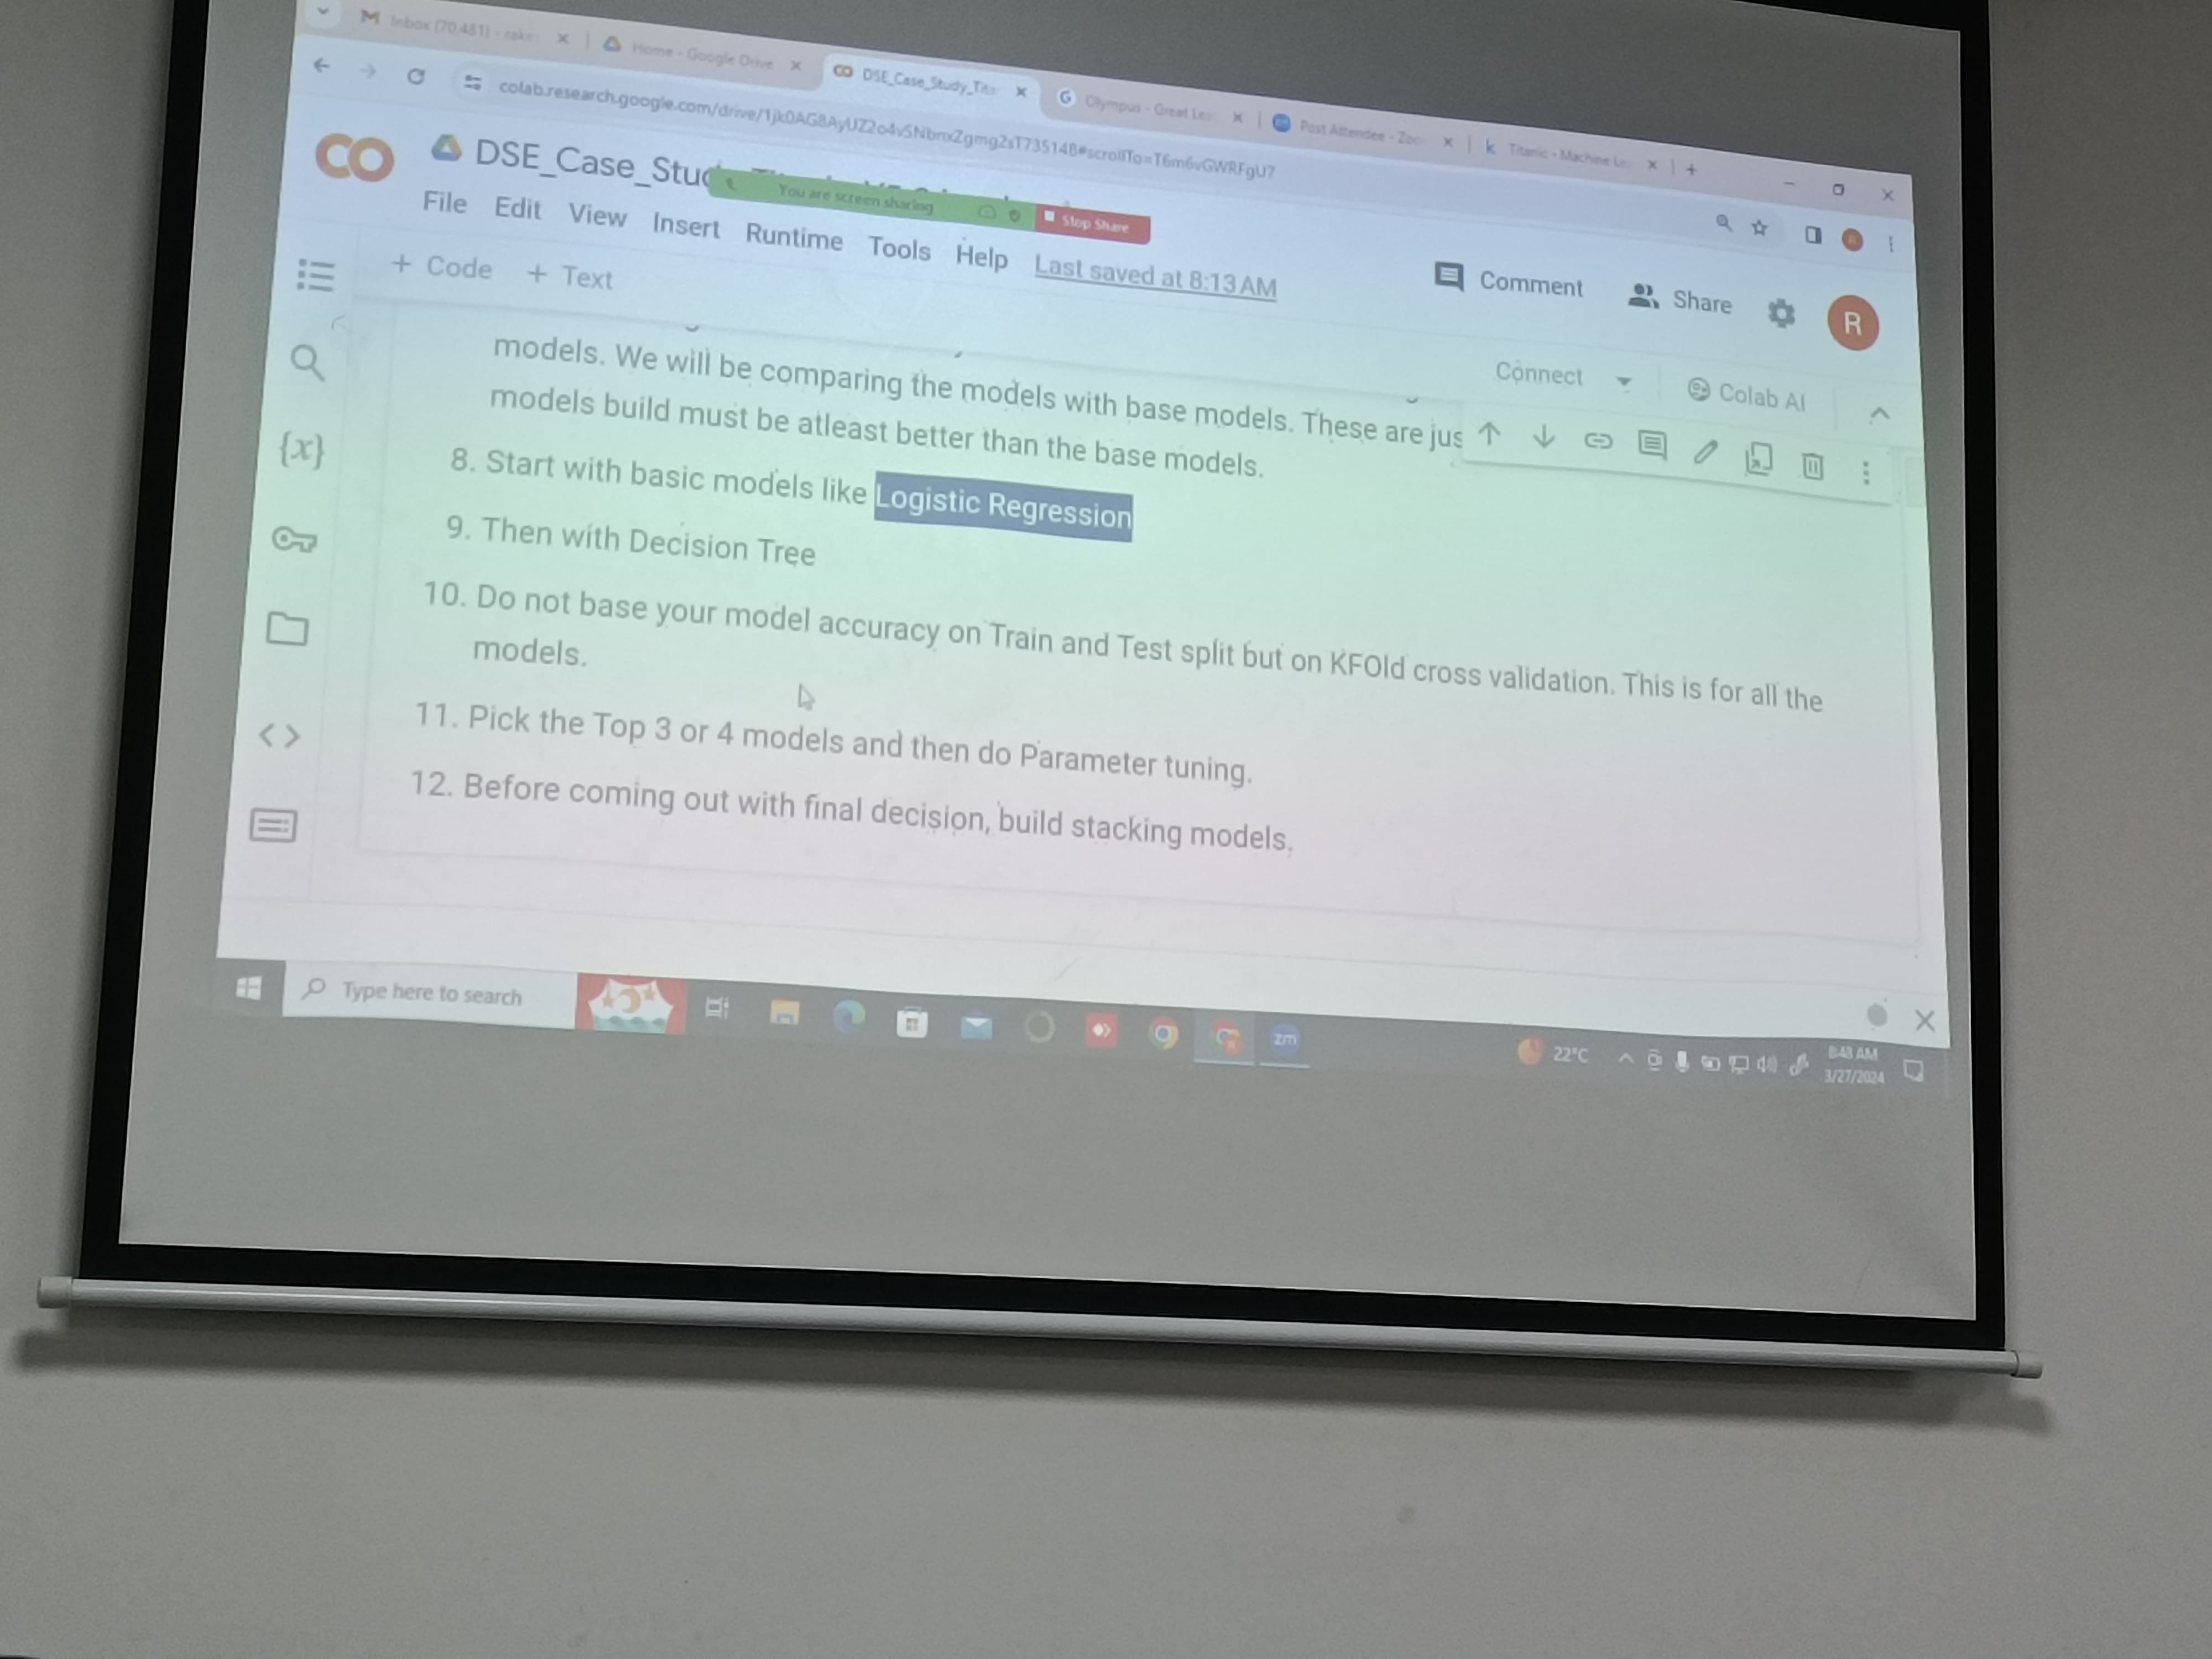

In [4]:
df_titanic=pd.concat([train,test],axis=0,ignore_index=True)
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df_titanic.shape

(1309, 12)

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


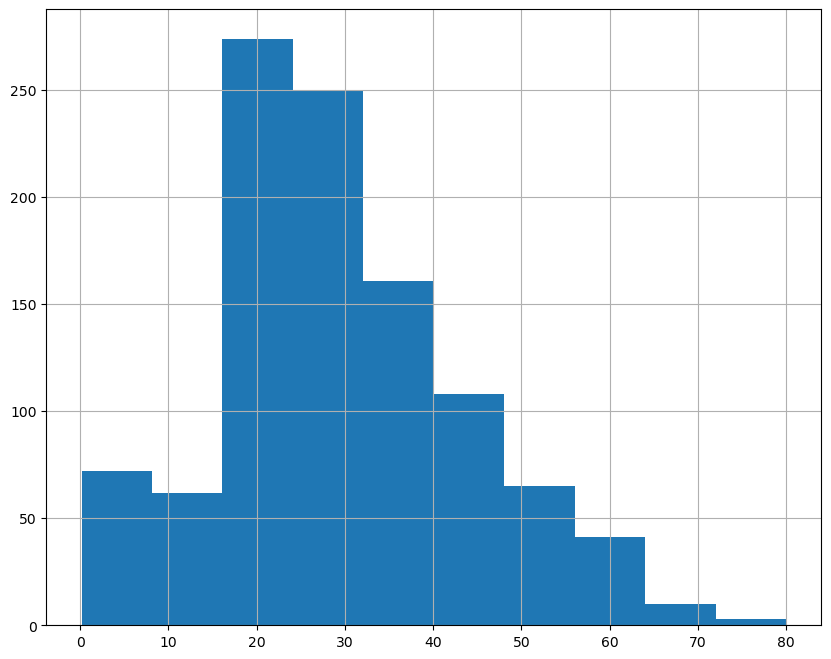

In [7]:
df_titanic["Age"].hist()
plt.show()

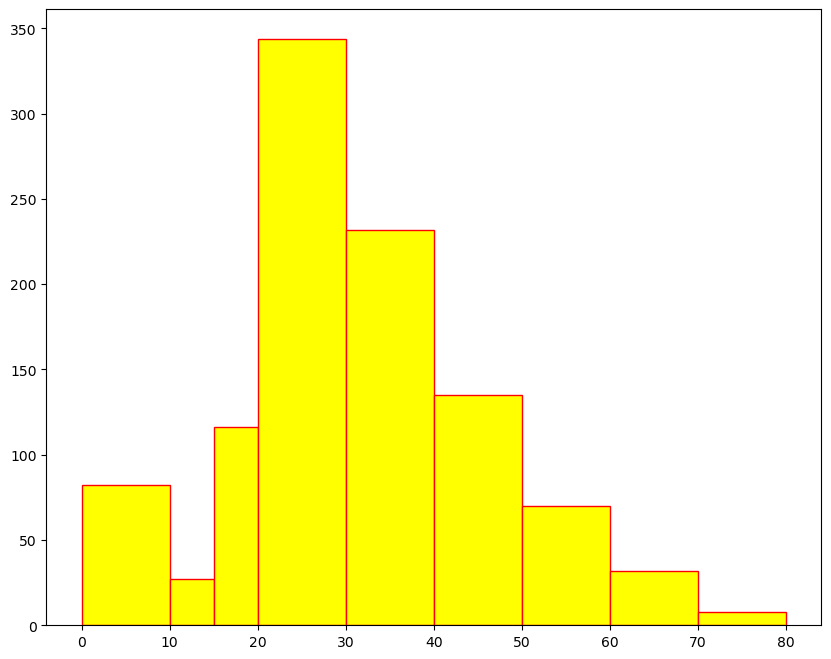

In [8]:
plt.hist(x="Age",data=df_titanic,bins=[0,10,15,20,30,40,50,60,70,80],color="yellow",edgecolor="r")
plt.show()

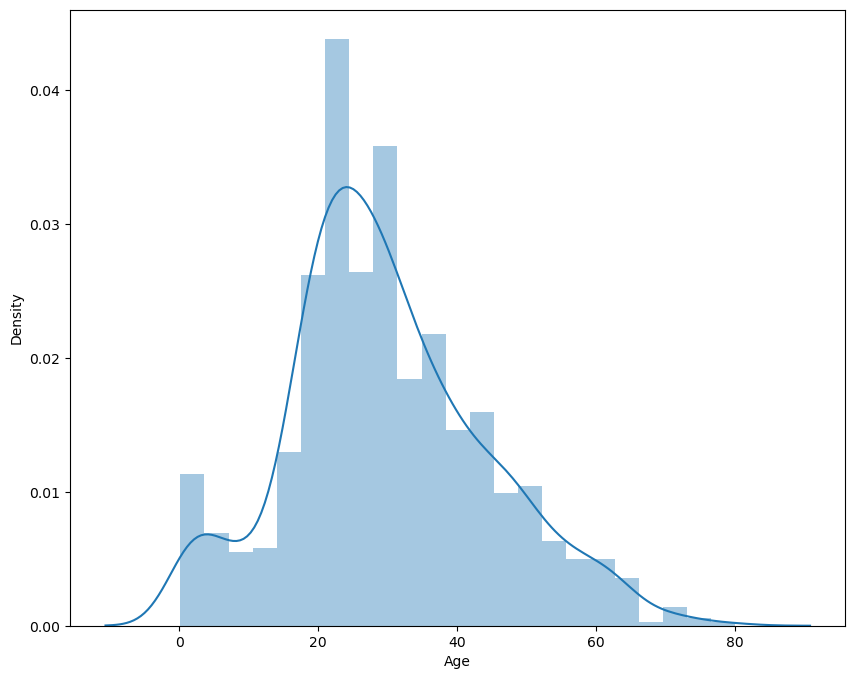

In [9]:
sns.distplot(df_titanic["Age"])
plt.show()

* Data is skewed to right

In [10]:
me = df_titanic["Age"].mean()
md = df_titanic["Age"].median()
mo = df_titanic["Age"].mode()[0]

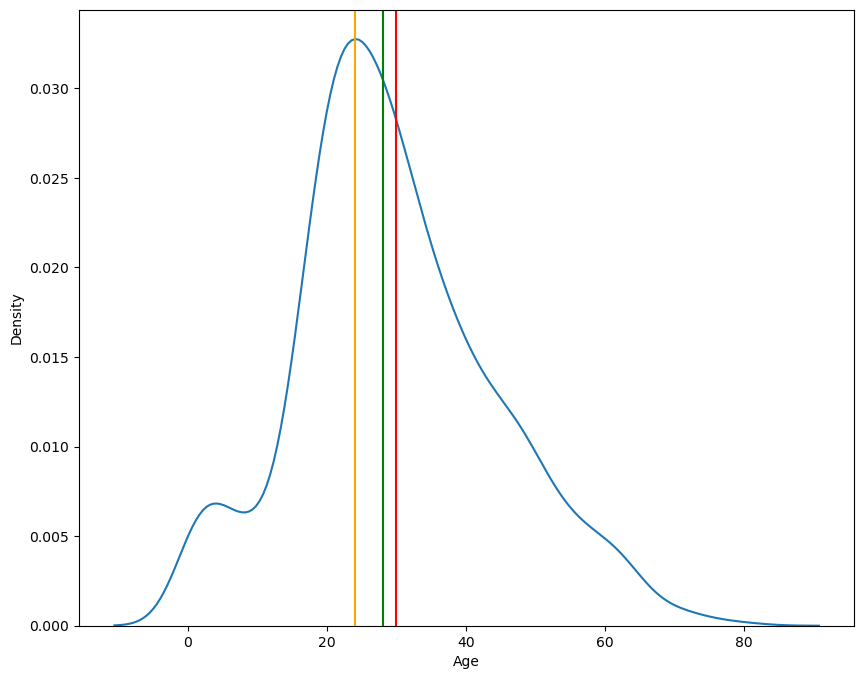

In [11]:
sns.kdeplot(df_titanic["Age"])
plt.axvline(me,label="Mean",color="Red")
plt.axvline(md,label="Median",color="Green")
plt.axvline(mo,label="Mode",color="Orange")

In [12]:
print("skeweness is",df_titanic["Age"].skew())
print("Kurtosis is ", df_titanic["Age"].kurtosis())

skeweness is 0.40767455974362266
Kurtosis is  0.1469476357378139


* better to use square transformation after checking with skewness

In [13]:
df_titanic["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

* we can find out the anomolies using describe
1. Looking at the min age, there are kids
2. There are elder people of the age-80
3. 50% of the people are below 28 years of Age

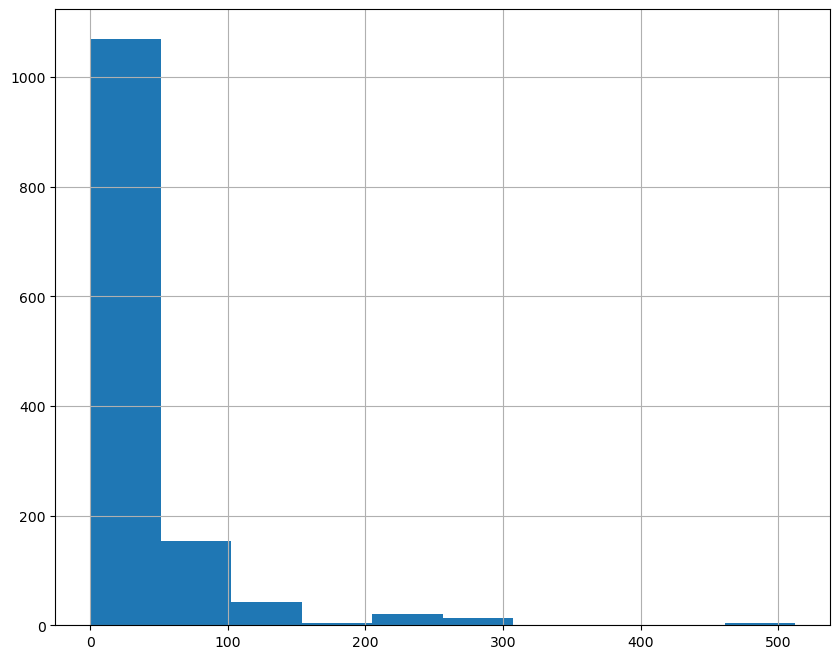

In [14]:
df_titanic["Fare"].hist()
plt.show()

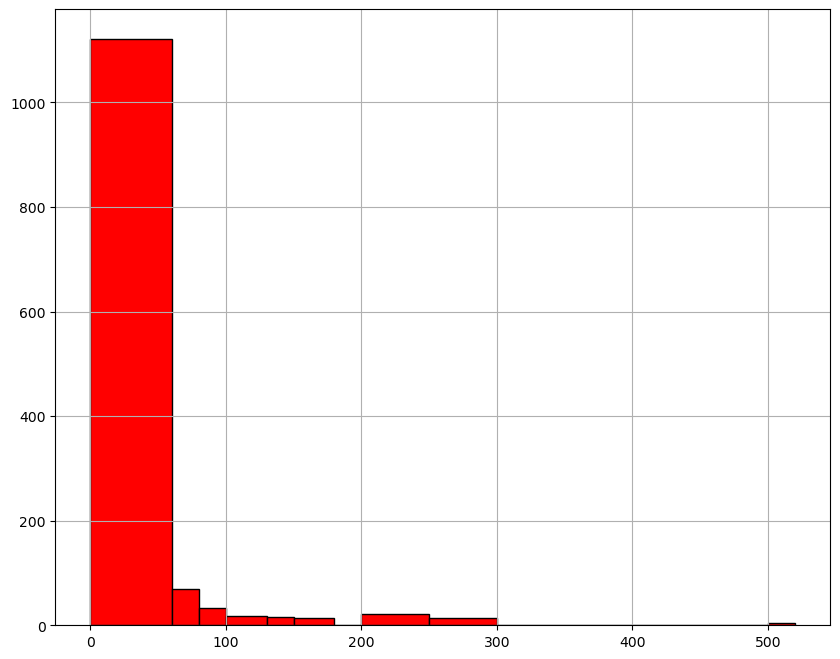

In [15]:
df_titanic["Fare"].hist(bins=[0,60,80,100,130,150,180,200,250,300,400,480,500,520],color="red",edgecolor="black")
plt.show()

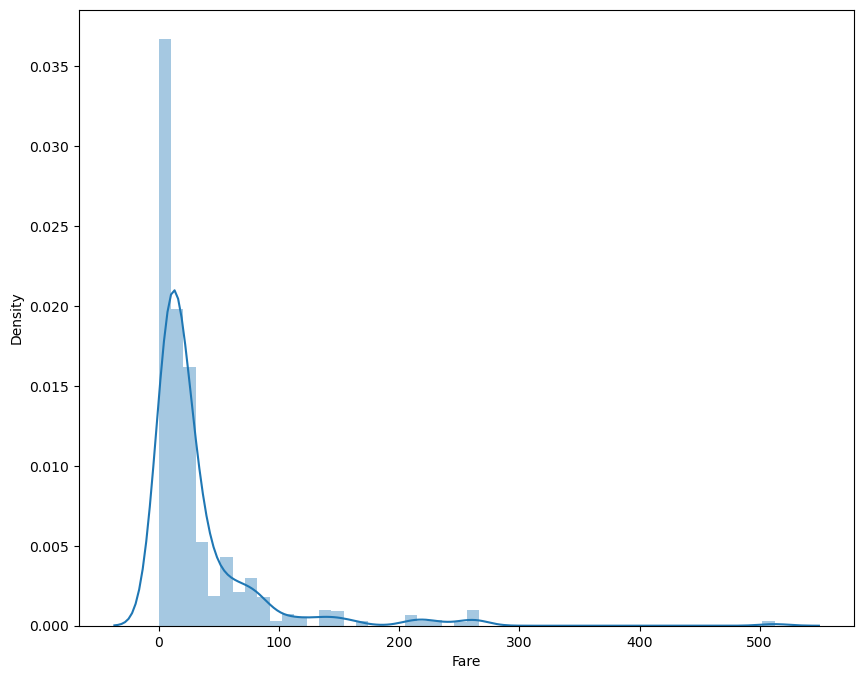

In [16]:
sns.distplot(df_titanic["Fare"])
plt.show()

In [17]:
me = df_titanic["Fare"].mean()
md = df_titanic["Fare"].median()
mo = df_titanic["Fare"].mode()[0]

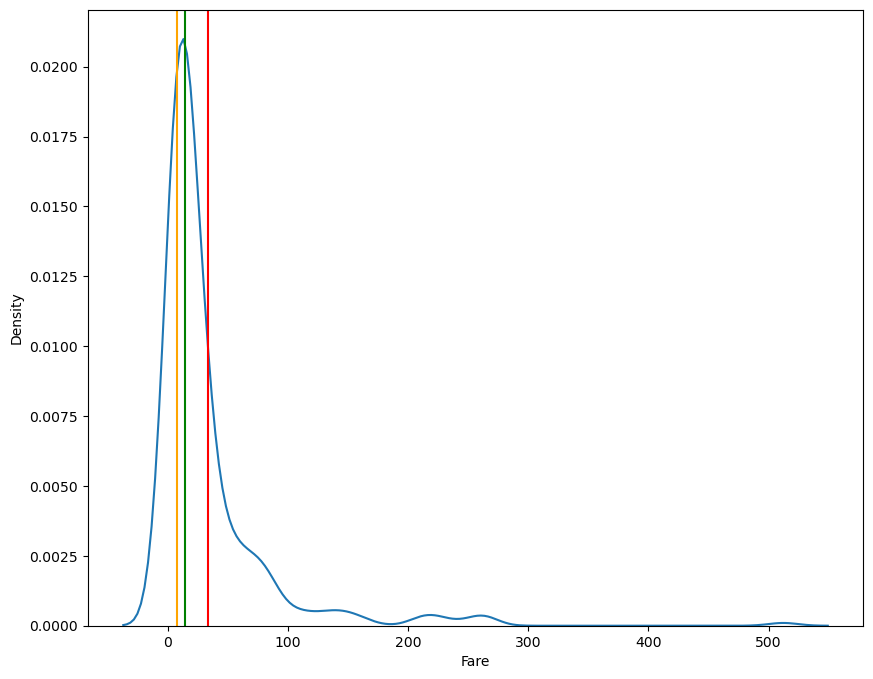

In [18]:
sns.kdeplot(df_titanic["Fare"])
plt.axvline(me,label="Mean",color="Red")
plt.axvline(md,label="Median",color="Green")
plt.axvline(mo,label="Mode",color="Orange")

* Fare here is right skewed 

In [19]:
print("skeweness is",df_titanic["Fare"].skew())
print("Kurtosis is ", df_titanic["Fare"].kurtosis())

skeweness is 4.367709134122922
Kurtosis is  27.027986349442294


* here boxcox or yeo jonson transformation can be used bcz the skewness is high

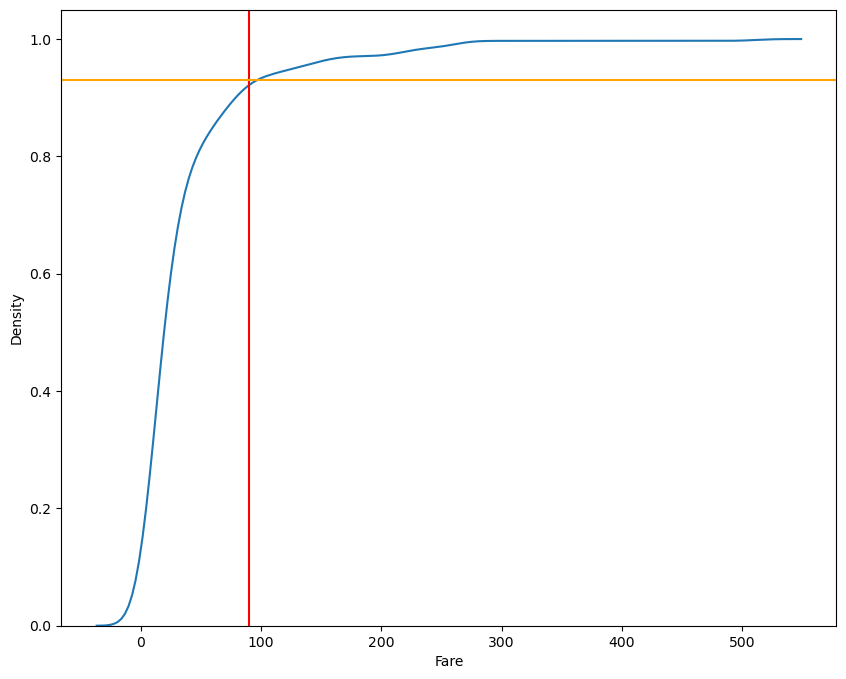

In [20]:
sns.kdeplot(x='Fare',data=df_titanic,cumulative=True)
plt.axvline(90,color='red')
plt.axhline(0.93,color ='orange')
plt.show()

* 93% chance that the people are paying a fare of <90
* 7% of people who are paying greater than 90

In [21]:
df_titanic["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

1. Fare is highly skewed 
2. 50% of the fair are above 14.


In [22]:
df_titanic["Fare"][df_titanic["Fare"]==0].count()

17

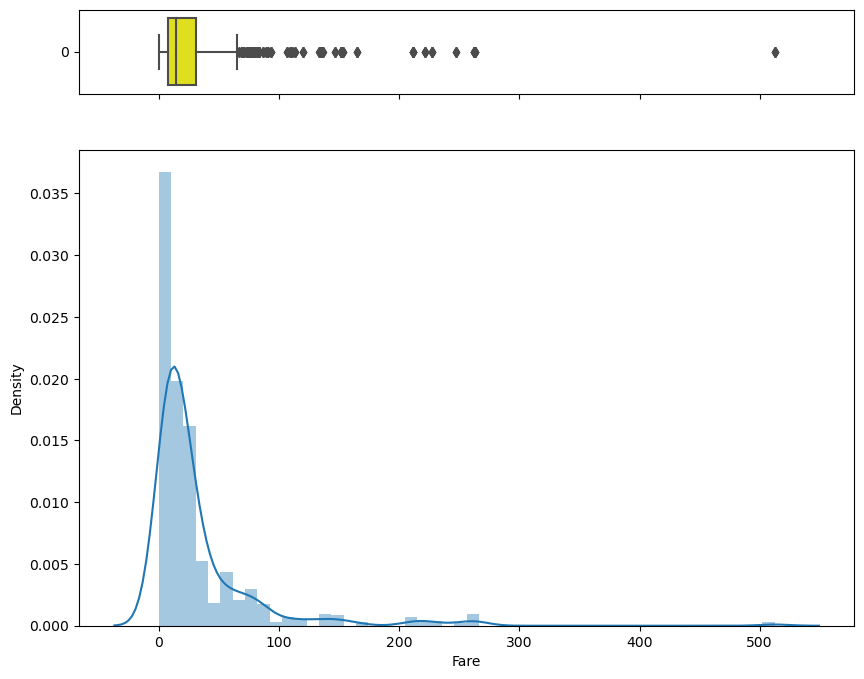

In [23]:
area, (first_box, second_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_titanic['Fare'], ax=first_box, orient='h',color='yellow')
sns.distplot(df_titanic['Fare'], ax=second_hist)
plt.show()

In [24]:
num_cols=df_titanic.select_dtypes(include=np.number)
num_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [25]:
num_cols=num_cols[["Age","Fare"]]

In [26]:
plt.rcParams["figure.figsize"]=[5,5]

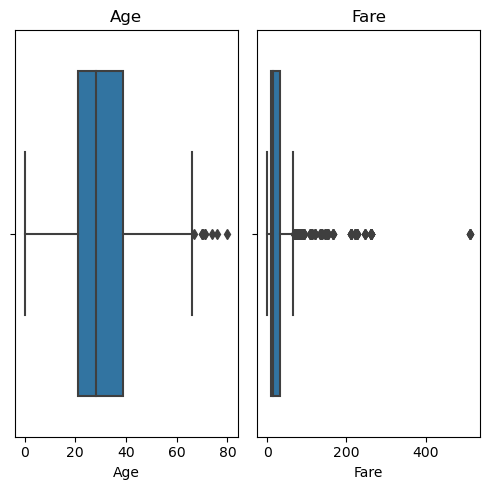

In [27]:
t=1
for i in num_cols:
        plt.subplot(1,2,t)
        sns.boxplot(x=df_titanic[i])
        plt.title(i)
        t+=1
plt.tight_layout()
plt.show()

In [28]:
cols=["Embarked","Survived","Sex"]

In [29]:
for i in cols:
    df_titanic[i]=df_titanic[i].astype(object)

In [30]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


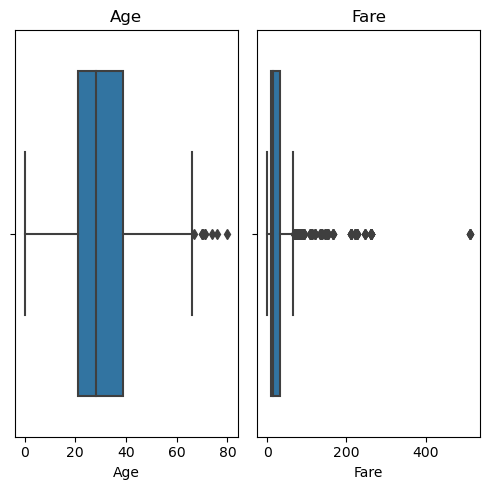

In [31]:
t=1
for i in num_cols:
        plt.subplot(1,2,t)
        sns.boxplot(x=df_titanic[i])
        plt.title(i)
        t+=1
plt.tight_layout()
plt.show()

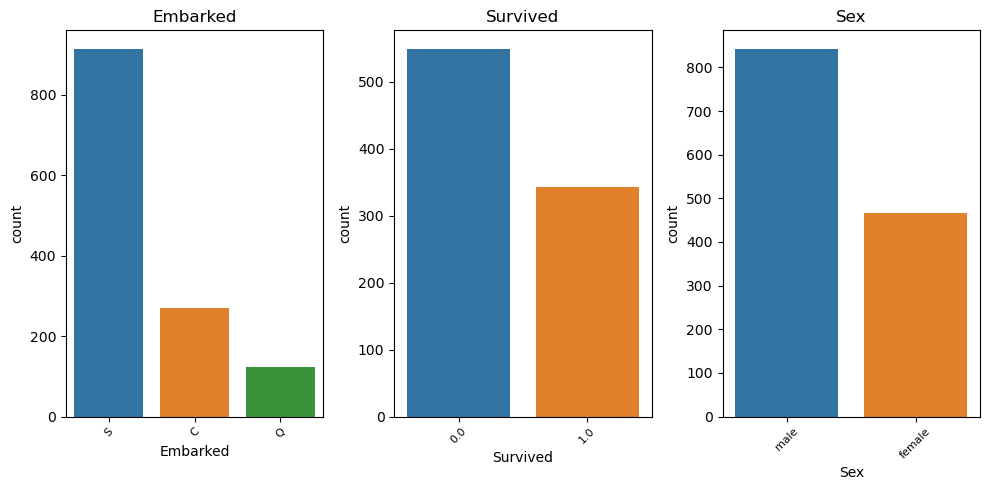

In [32]:
plt.rcParams["figure.figsize"]=[10,5]
t=1
for i in cols:
        plt.subplot(1,3,t)
        sns.countplot(x=df_titanic[i])
        t+=1
        plt.title(i)
        
        plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()
    

Inferences:

    1. many of them embarked from Southhampton
    2. count of female is less than the count of male

# Bivarient analysis

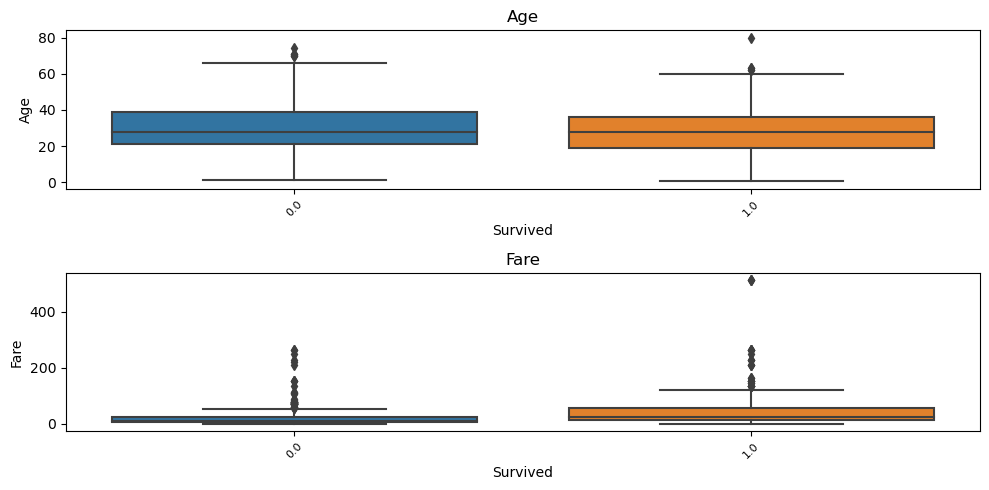

In [33]:
plt.rcParams["figure.figsize"]=[10,5]
t=1
for i in num_cols:
        plt.subplot(2,1,t)
        sns.boxplot(x=df_titanic["Survived"],y=df_titanic[i])
        t+=1
        plt.title(i)
        
        plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()
    

1. People with 80 years of age is survived
2. people who paid more fair are survivrd

In [34]:
# Multivarient Analysis

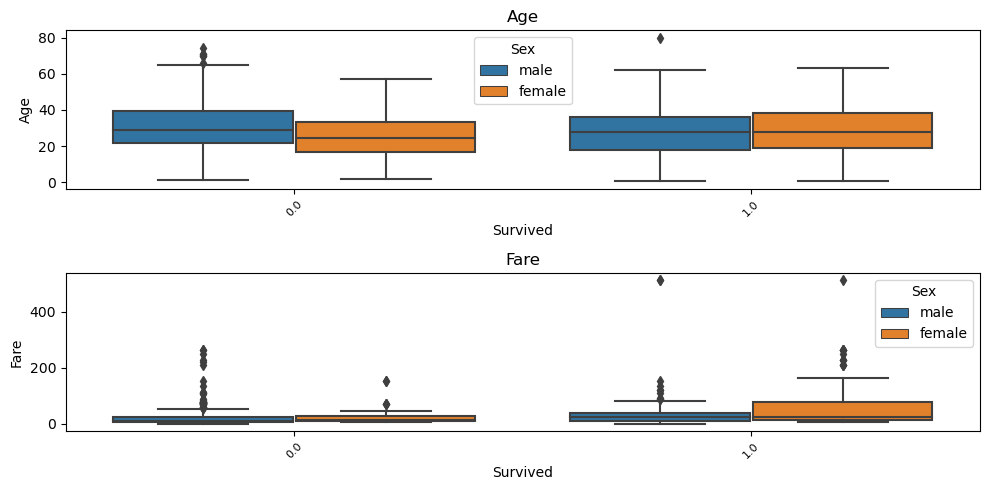

In [35]:
plt.rcParams["figure.figsize"]=[10,5]
t=1
for i in num_cols:
        plt.subplot(2,1,t)
        sns.boxplot(x=df_titanic["Survived"],y=df_titanic[i],hue=df_titanic["Sex"])
        t+=1
        plt.title(i)
        
        plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()
    

1. That was a man who was alived having age more than 80
2. femails are payinng more fair amount
3. people who have paid higher fair have been survived

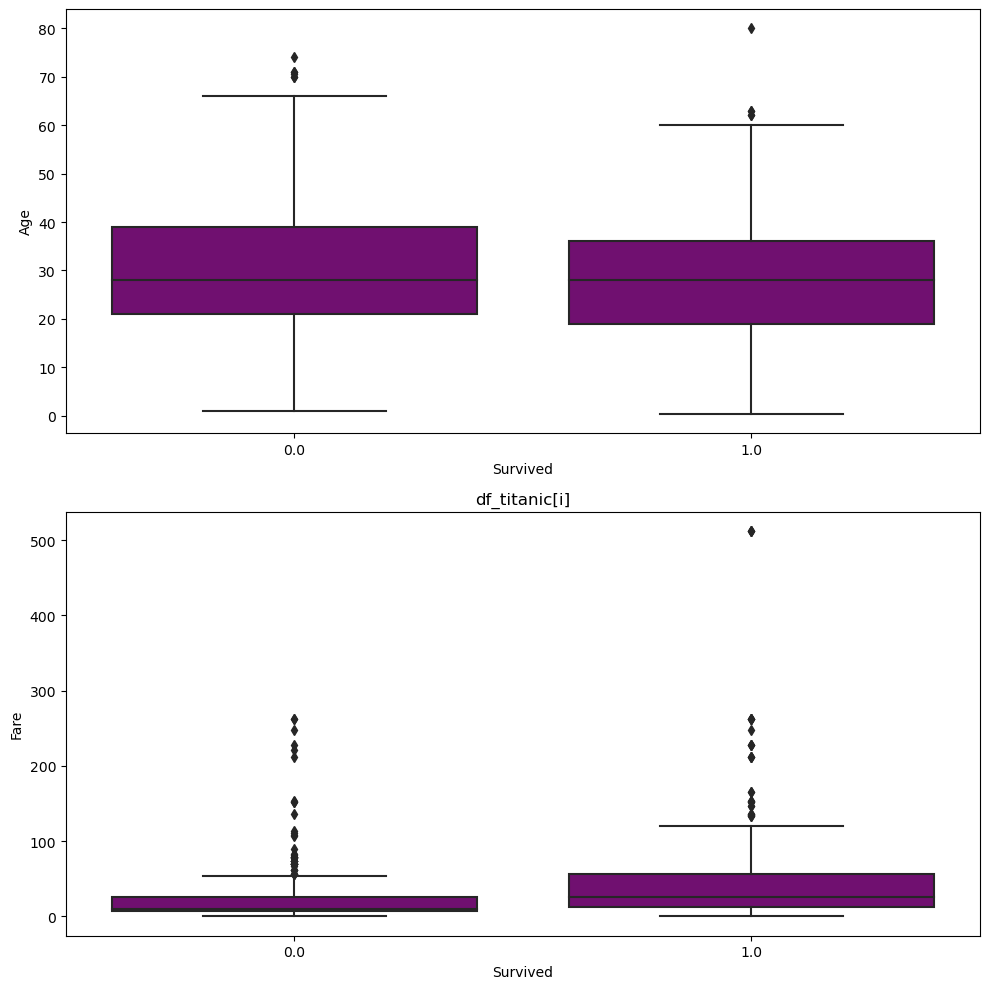

In [36]:
fig, ax= plt.subplots(2,1, figsize=(10,10))

for i, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(y=df_titanic[i],x=df_titanic['Survived'], ax=subplot,color='purple')
    plt.title('df_titanic[i]')

plt.tight_layout()
plt.show()

In [37]:
df_titanic.groupby("Survived")["Fare"].describe()

count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0.0       549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1.0       342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

In [38]:
df_titanic.groupby("Survived")["Pclass"].value_counts()

Survived  Pclass
0.0       3         372
          2          97
          1          80
1.0       1         136
          3         119
          2          87
Name: count, dtype: int64

In [39]:
df_titanic.groupby("Survived")["Pclass"].value_counts(normalize=True)*100

Survived  Pclass
0.0       3         67.759563
          2         17.668488
          1         14.571949
1.0       1         39.766082
          3         34.795322
          2         25.438596
Name: proportion, dtype: float64

In [40]:
pd.crosstab(df_titanic["Pclass"],df_titanic["Survived"])

Survived  0.0  1.0
Pclass            
1          80  136
2          97   87
3         372  119

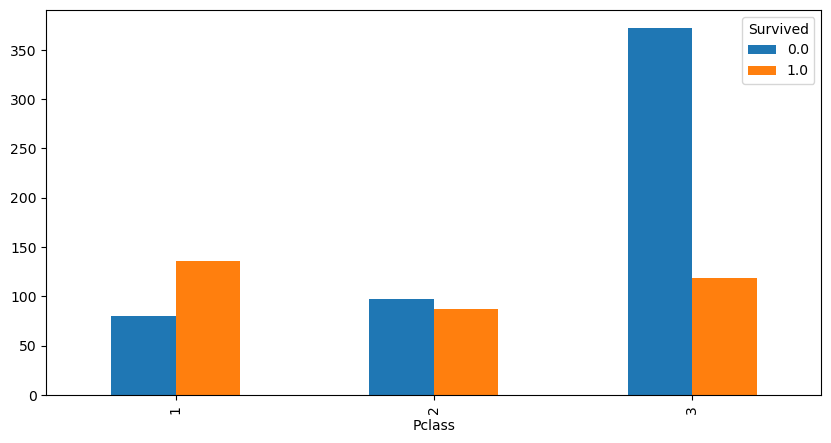

In [41]:
pd.crosstab(index=df_titanic["Pclass"],columns=df_titanic["Survived"]).plot(kind="bar")
plt.show()

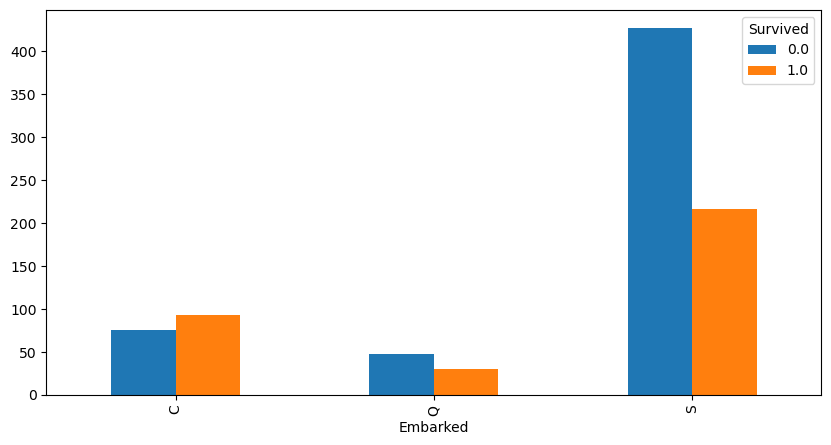

In [42]:
pd.crosstab(index=df_titanic["Embarked"],columns=df_titanic["Survived"]).plot(kind="bar")
plt.show()

In [43]:
pd.crosstab(index=df_titanic["Embarked"],columns=df_titanic["Survived"])

Survived  0.0  1.0
Embarked          
C          75   93
Q          47   30
S         427  217

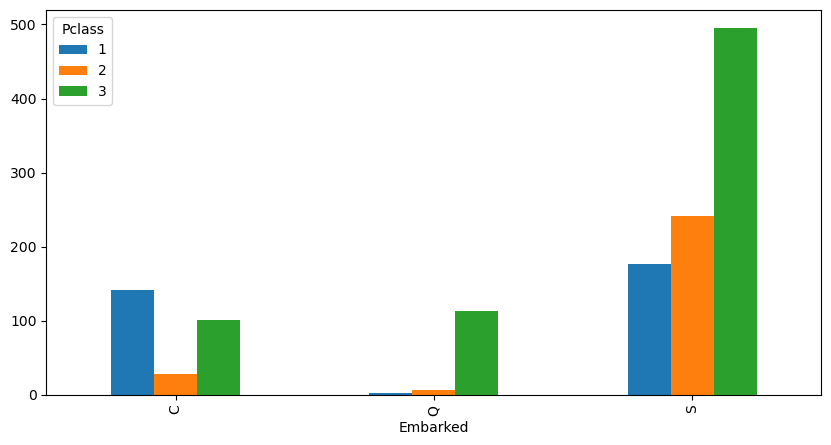

In [44]:
pd.crosstab(index=df_titanic["Embarked"],columns=df_titanic["Pclass"]).plot(kind="bar")
plt.show()

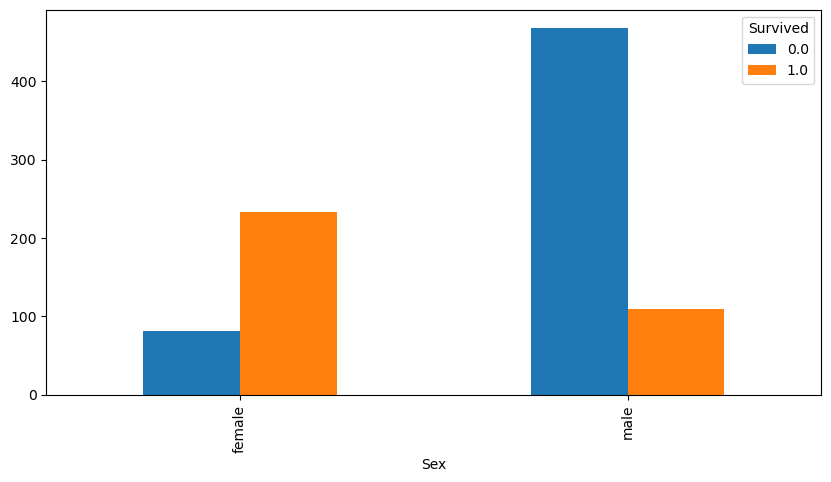

In [45]:
pd.crosstab(index=df_titanic["Sex"],columns=df_titanic["Survived"]).plot(kind="bar")
plt.show()

In [46]:
import plotly.express as px

In [47]:
px.histogram(df_titanic,x="Age",color="Embarked")

##Categorical vs categorical 

In [48]:
cats=["Embarked","Pclass","SibSp","Parch","Sex"]

<Figure size 300x300 with 0 Axes>

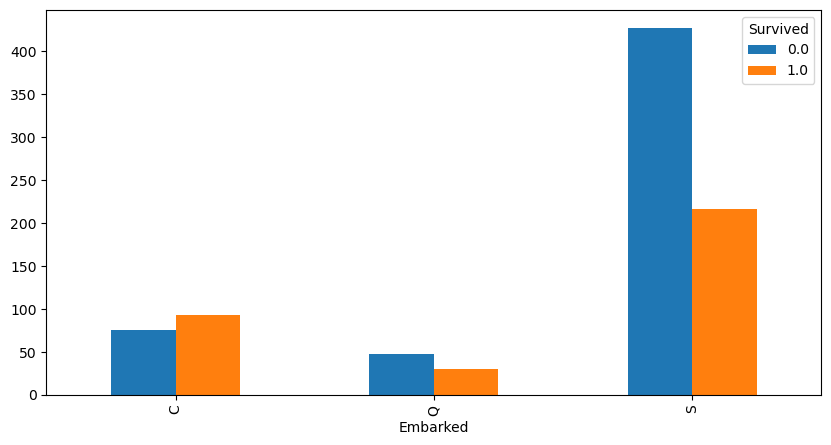

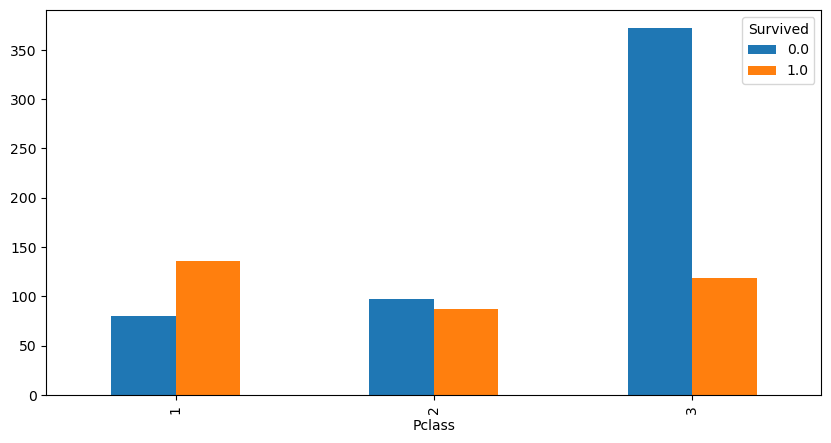

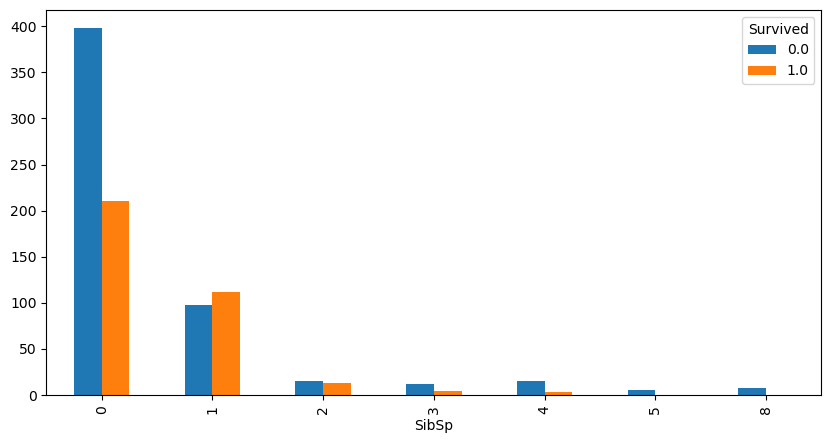

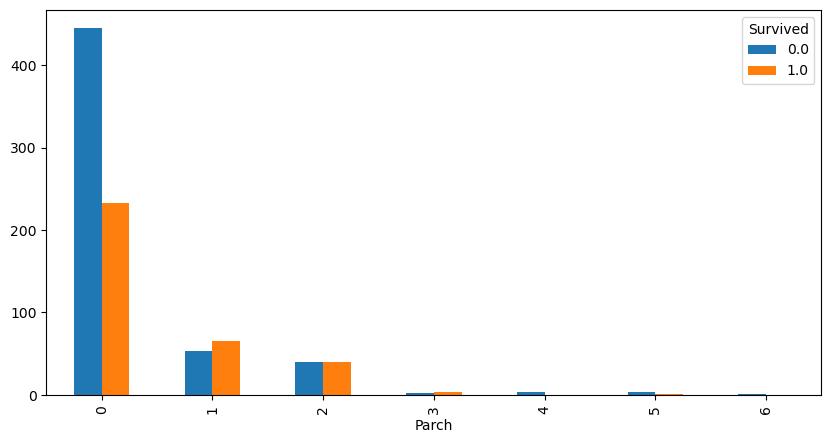

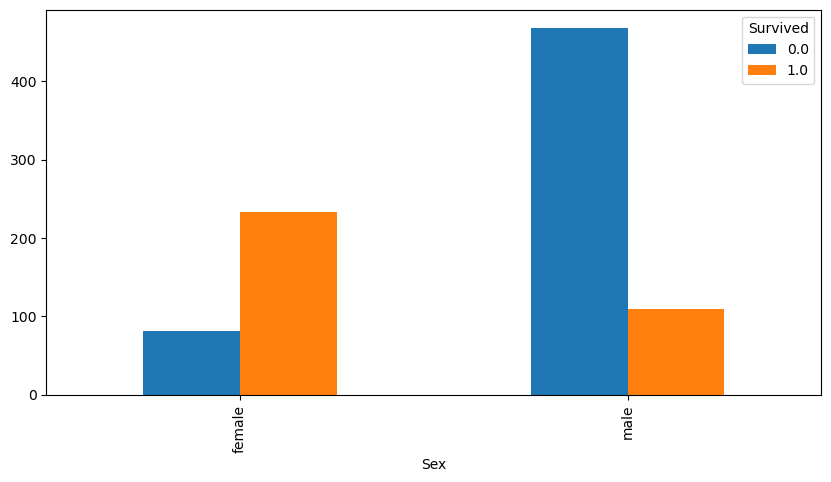

In [49]:
plt.figure(figsize=(3,3))
for i in cats:
    pd.crosstab(df_titanic[i],df_titanic["Survived"]).plot(kind="bar")
plt.show()

In [50]:
pd.crosstab(index=df_titanic["Pclass"],
           columns=df_titanic["Sex"],
           values=df_titanic["Fare"],
           aggfunc=np.mean)

Sex         female       male
Pclass                       
1       109.412385  69.888385
2        23.234827  19.904946
3        15.324250  12.415462

In [51]:
df_titanic.pivot_table(values="Fare",
                      index="Embarked",
                      columns="Sex",
                      aggfunc=np.mean)

Sex          female       male
Embarked                      
C         81.128540  48.810619
Q         12.550837  12.273941
S         39.339305  21.841878

In [52]:
df_titanic.groupby(["Embarked","Sex"])["Fare"].mean()

Embarked  Sex   
C         female    81.128540
          male      48.810619
Q         female    12.550837
          male      12.273941
S         female    39.339305
          male      21.841878
Name: Fare, dtype: float64

In [53]:
df_titanic.groupby(["Embarked","Sex","Pclass"])["Fare"].mean()

Embarked  Sex     Pclass
C         female  1         118.895949
                  2          27.003791
                  3          13.834545
          male    1          94.622560
                  2          20.904406
                  3           9.775901
Q         female  1          90.000000
                  2          12.350000
                  3           9.791968
          male    1          90.000000
                  2          11.489160
                  3          10.979167
S         female  1         101.069145
                  2          23.023118
                  3          18.083851
          male    1          53.670756
                  2          20.073322
                  3          13.145977
Name: Fare, dtype: float64

# FacetGrid

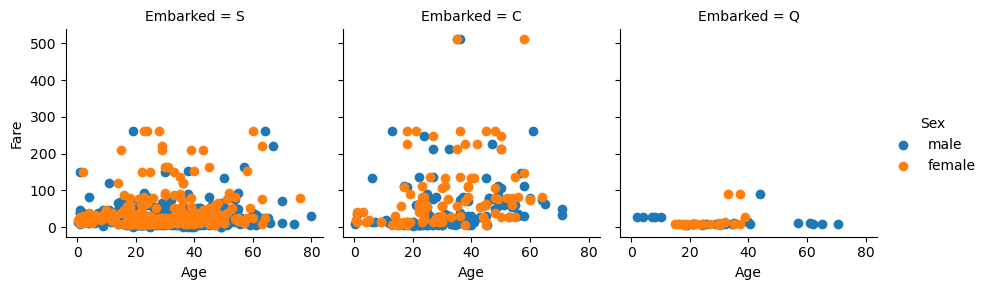

In [54]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Sex")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

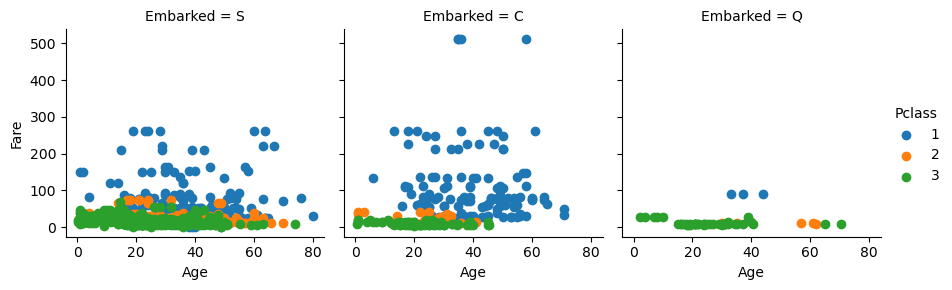

In [55]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Pclass")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

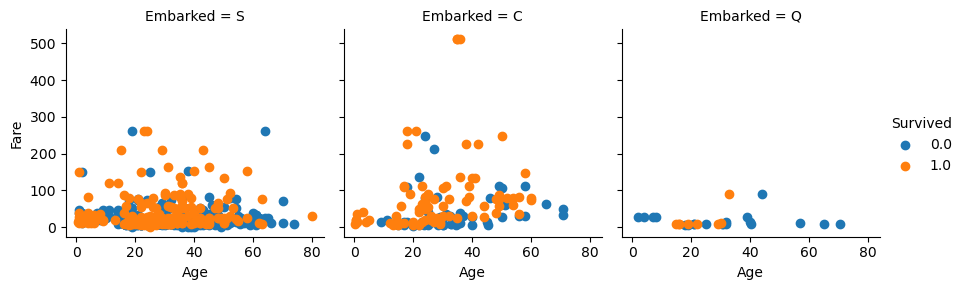

In [56]:
titanicplot=sns.FacetGrid(df_titanic,col="Embarked",hue="Survived")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

In [57]:
(df_titanic.isna().sum()/len(df_titanic)*100).sort_values(ascending=False)

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

# Fancyimpute

In [58]:
# pip install fancyimpute

In [59]:
df_titanic.groupby("Sex")["Age"].describe()

count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  388.0  28.687088  14.576962  0.17  19.0  27.0  38.0  76.0
male    658.0  30.585228  14.280581  0.33  21.0  28.0  39.0  80.0

In [60]:
from fancyimpute import KNN,IterativeImputer

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [63]:
num_cols =df_titanic.select_dtypes(np.number)
num_cols=num_cols[["Age","Fare"]]

In [64]:
sc=StandardScaler()
df_num_sc=pd.DataFrame(sc.fit_transform(num_cols),columns=num_cols.columns)
df_num_sc.head()

Age      Fare
0 -0.547050 -0.503402
1  0.563552  0.734222
2 -0.269400 -0.490356
3  0.355314  0.382778
4  0.355314 -0.487940

In [65]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1046 non-null   float64
 1   Fare    1308 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB


In [66]:
from sklearn.impute import KNNImputer
imputer =KNNImputer(n_neighbors=5)
df_num_sc["Age"] = imputer.fit_transform(df_num_sc[["Age"]])
df_num_sc["Fare"]=imputer.fit_transform(df_num_sc[["Fare"]])

In [67]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1309 non-null   float64
 1   Fare    1309 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB


In [68]:
df_num =pd.DataFrame(sc.inverse_transform(df_num_sc),columns=df_num_sc.columns)
df_num.head()

Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

In [69]:
df_others =df_titanic[['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked']]

In [70]:
df_titanic=pd.concat([df_num,df_others],axis=1)

In [71]:
df_titanic.isna().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          2
dtype: int64

In [72]:
from sklearn.impute import SimpleImputer

In [73]:
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df_titanic["Embarked"]=pd.DataFrame(imp.fit_transform(pd.DataFrame(df_titanic["Embarked"])))

In [74]:
df_titanic.isna().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          0
dtype: int64

In [75]:
df_titanic.columns

Index(['Age', 'Fare', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
df_titanic.groupby("Pclass")["Cabin"].describe()

count unique          top freq
Pclass                               
1        256    168  C23 C25 C27    6
2         23      9          F33    4
3         16      9           G6    5

In [77]:
pd.crosstab(df_titanic["Pclass"],df_titanic["Cabin"])

Cabin   A10  A11  A14  A16  A18  A19  A20  A21  A23  A24  A26  A29  A31  A32  \
Pclass                                                                         
1         1    1    1    1    1    1    1    1    1    1    1    1    1    1   
2         0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3         0    0    0    0    0    0    0    0    0    0    0    0    0    0   

Cabin   A34  A36  A5  A6  A7  A9  B10  B101  B102  B11  B18  ...  E44  E45  \
Pclass                                                       ...             
1         3    1   1   1   1   1    1     1     1    1    2  ...    2    1   
2         0    0   0   0   0   0    0     0     0    0    0  ...    0    0   
3         0    0   0   0   0   0    0     0     0    0    0  ...    0    0   

Cabin   E46  E49  E50  E52  E58  E60  E63  E67  E68  E77  E8  F  F E46  F E57  \
Pclass                                                                          
1         2    1    2    1    1    1    1    2    1    0   2  0      0      0   
2         0    0    0    0    0    0    0    0    0    1   0  1      0      0   
3         0    0    0    0    0    0    0    0    0    0   0  0      1      1   

Cabin   F E69  F G63  F G73  F2  F33  F38  F4  G6  T  
Pclass                                                
1           0      0      0   0    0    0   0   0  1  
2           0      0      0   4    4    0   4   0  0  
3           1      2      2   0    0    1   0   5  0  

[3 rows x 186 columns]

In [78]:
pd.set_option("display.max_columns",200)

In [79]:
pd.crosstab(df_titanic["Pclass"],df_titanic["Cabin"])

Cabin   A10  A11  A14  A16  A18  A19  A20  A21  A23  A24  A26  A29  A31  A32  \
Pclass                                                                         
1         1    1    1    1    1    1    1    1    1    1    1    1    1    1   
2         0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3         0    0    0    0    0    0    0    0    0    0    0    0    0    0   

Cabin   A34  A36  A5  A6  A7  A9  B10  B101  B102  B11  B18  B19  B20  B22  \
Pclass                                                                       
1         3    1   1   1   1   1    1     1     1    1    2    1    2    2   
2         0    0   0   0   0   0    0     0     0    0    0    0    0    0   
3         0    0   0   0   0   0    0     0     0    0    0    0    0    0   

Cabin   B24  B26  B28  B3  B30  B35  B36  B37  B38  B39  B4  B41  B42  B45  \
Pclass                                                                       
1         1    1    2   1    1    2    1    1    1    1   1    2    1    2   
2         0    0    0   0    0    0    0    0    0    0   0    0    0    0   
3         0    0    0   0    0    0    0    0    0    0   0    0    0    0   

Cabin   B49  B5  B50  B51 B53 B55  B52 B54 B56  B57 B59 B63 B66  B58 B60  B61  \
Pclass                                                                          
1         2   2    1            3            1                5        3    1   
2         0   0    0            0            0                0        0    0   
3         0   0    0            0            0                0        0    0   

Cabin   B69  B71  B73  B77  B78  B79  B80  B82 B84  B86  B94  B96 B98  C101  \
Pclass                                                                        
1         2    2    1    2    2    1    1        1    1    1        4     3   
2         0    0    0    0    0    0    0        0    0    0        0     0   
3         0    0    0    0    0    0    0        0    0    0        0     0   

Cabin   C103  C104  C105  C106  C110  C111  C116  C118  C123  C124  C125  \
Pclass                                                                     
1          1     1     1     2     1     1     2     1     2     2     2   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   

Cabin   C126  C128  C130  C132  C148  C2  C22 C26  C23 C25 C27  C28  C30  C31  \
Pclass                                                                          
1          2     1     1     1     1   2        4            6    1    1    2   
2          0     0     0     0     0   0        0            0    0    0    0   
3          0     0     0     0     0   0        0            0    0    0    0   

Cabin   C32  C39  C45  C46  C47  C49  C50  C51  C52  C53  C54  C55 C57  C6  \
Pclass                                                                       
1         2    1    1    2    1    1    1    1    2    1    2        2   2   
2         0    0    0    0    0    0    0    0    0    0    0        0   0   
3         0    0    0    0    0    0    0    0    0    0    0        0   0   

Cabin   C62 C64  C65  C68  C7  C70  C78  C80  C82  C83  C85  C86  C87  C89  \
Pclass                                                                       
1             2    2    2   2    1    4    2    1    2    2    2    1    2   
2             0    0    0   0    0    0    0    0    0    0    0    0    0   
3             0    0    0   0    0    0    0    0    0    0    0    0    0   

Cabin   C90  C91  C92  C93  C95  C97  C99  D  D10 D12  D11  D15  D17  D19  \
Pclass                                                                      
1         1    1    2    2    1    1    1  0        2    1    2    2    2   
2         0    0    0    0    0    0    0  4        0    0    0    0    0   
3         0    0    0    0    0    0    0  0        0    0    0    0    0   

Cabin   D20  D21  D22  D26  D28  D30  D33  D34  D35  D36  D3

In [80]:
df_titanic

Age      Fare  PassengerId Survived  Pclass  \
0     22.000000    7.2500            1      0.0       3   
1     38.000000   71.2833            2      1.0       1   
2     26.000000    7.9250            3      1.0       3   
3     35.000000   53.1000            4      1.0       1   
4     35.000000    8.0500            5      0.0       3   
...         ...       ...          ...      ...     ...   
1304  29.881138    8.0500         1305      NaN       3   
1305  39.000000  108.9000         1306      NaN       1   
1306  38.500000    7.2500         1307      NaN       3   
1307  29.881138    8.0500         1308      NaN       3   
1308  29.881138   22.3583         1309      NaN       3   

                                                   Name     Sex  SibSp  Parch  \
0                               Braund, Mr. Owen Harris    male      1      0   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                                Heikkinen, Miss. Laina  female      0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                              Allen, Mr. William Henry    male      0      0   
...                                                 ...     ...    ...    ...   
1304                                 Spector, Mr. Woolf    male      0      0   
1305                       Oliva y Ocana, Dona. Fermina  female      0      0   
1306                       Saether, Mr. Simon Sivertsen    male      0      0   
1307                                Ware, Mr. Frederick    male      0      0   
1308                           Peter, Master. Michael J    male      1      1   

                  Ticket Cabin Embarked  
0              A/5 21171   NaN        S  
1               PC 17599   C85        C  
2       STON/O2. 3101282   NaN        S  
3                 113803  C123        S  
4                 373450   NaN        S  
...                  ...   ...      ...  
1304           A.5. 3236   NaN        S  
1305            PC 17758  C105        C  
1306  SOTON/O.Q. 3101262   NaN        S  
1307              359309   NaN        S  
1308                2668   NaN        C  

[1309 rows x 12 columns]

In [81]:
df_titanic.drop("Cabin",axis=1,inplace=True)

In [82]:
df_titanic.groupby("Pclass")["Ticket"].describe()

count unique           top freq
Pclass                                
1        323    188      PC 17608    7
2        277    192  S.O.C. 14879    7
3        709    549      CA. 2343   11

In [83]:
df_g1 =df_titanic.groupby("Pclass")
df_g1.get_group(1).describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  323.000000  323.000000    323.00000   323.0  323.000000  323.000000
mean    38.039580   87.508992    672.49226     1.0    0.436533    0.365325
std     13.970676   80.447178    368.72570     0.0    0.609064    0.715602
min      0.920000    0.000000      2.00000     1.0    0.000000    0.000000
25%     29.881138   30.695800    347.00000     1.0    0.000000    0.000000
50%     36.000000   60.000000    670.00000     1.0    0.000000    0.000000
75%     48.000000  107.662500    973.50000     1.0    1.000000    0.500000
max     80.000000  512.329200   1306.00000     1.0    3.000000    4.000000

In [84]:
df_g1 =df_titanic.groupby("Pclass")
df_g1.get_group(2).describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  277.000000  277.000000   277.000000   277.0  277.000000  277.000000
mean    29.528333   21.179196   671.566787     2.0    0.393502    0.368231
std     13.237693   13.607122   383.707495     0.0    0.590100    0.692717
min      0.670000    0.000000    10.000000     2.0    0.000000    0.000000
25%     23.000000   13.000000   341.000000     2.0    0.000000    0.000000
50%     29.000000   15.045800   671.000000     2.0    0.000000    0.000000
75%     36.000000   26.000000  1035.000000     2.0    1.000000    1.000000
max     70.000000   73.500000  1298.000000     2.0    3.000000    3.000000

In [85]:
df_g1 =df_titanic.groupby("Pclass")
df_pclass3=df_g1.get_group(3)

In [86]:
df_pclass3.describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  709.000000  709.000000   709.000000   709.0  709.000000  709.000000
mean    26.302224   13.331087   640.558533     3.0    0.568406    0.400564
std     10.310818   11.510752   379.887782     0.0    1.299681    0.981639
min      0.170000    0.000000     1.000000     3.0    0.000000    0.000000
25%     21.000000    7.750000   302.000000     3.0    0.000000    0.000000
50%     29.881138    8.050000   644.000000     3.0    0.000000    0.000000
75%     29.881138   15.245800   971.000000     3.0    1.000000    0.000000
max     74.000000   69.550000  1309.000000     3.0    8.000000    9.000000

In [87]:
df_pclass3["Ticket"]

0                A/5 21171
2         STON/O2. 3101282
4                   373450
5                   330877
7                   349909
               ...        
1303                347086
1304             A.5. 3236
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 709, dtype: object

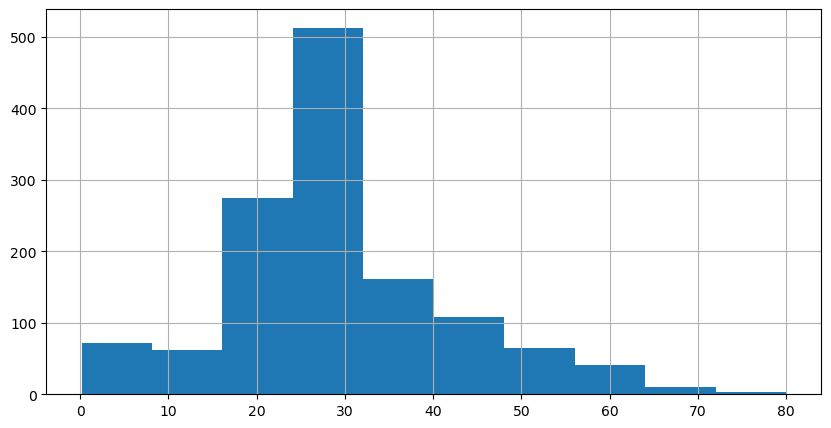

In [88]:
df_titanic["Age"].hist()
plt.show()

In [89]:
bins =[0,15,20,35,55,85]
labels=["Young","Teenager","Adult-Young","Adult_Middle","Adult-Old"]
df_titanic["Age_Group"]=pd.cut(df_titanic["Age"],bins=bins,labels=labels,include_lowest=True)
df_titanic.head()

Age     Fare  PassengerId Survived  Pclass  \
0  22.0   7.2500            1      0.0       3   
1  38.0  71.2833            2      1.0       1   
2  26.0   7.9250            3      1.0       3   
3  35.0  53.1000            4      1.0       1   
4  35.0   8.0500            5      0.0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket Embarked     Age_Group  
0         A/5 21171        S   Adult-Young  
1          PC 17599        C  Adult_Middle  
2  STON/O2. 3101282        S   Adult-Young  
3            113803        S   Adult-Young  
4            373450        S   Adult-Young

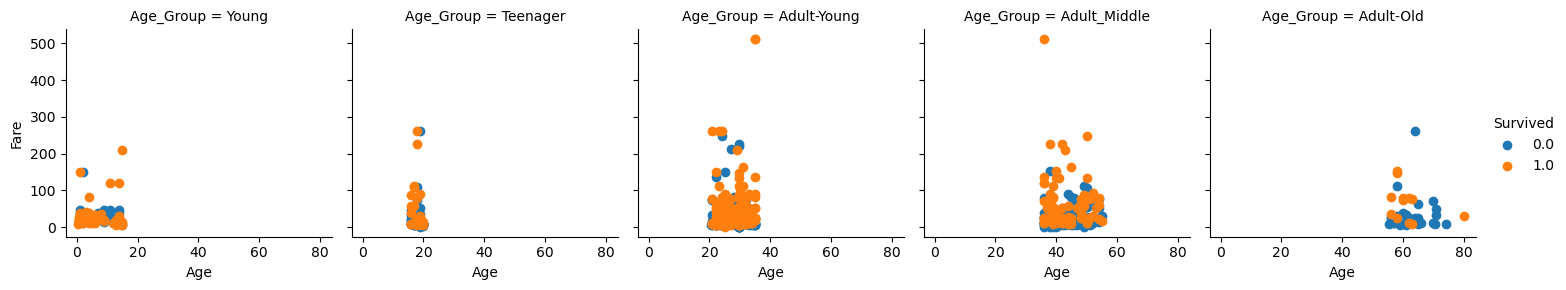

In [90]:
titanicplot=sns.FacetGrid(df_titanic,col="Age_Group",hue="Survived")
titanicplot.map(plt.scatter,"Age","Fare").add_legend()
plt.show()

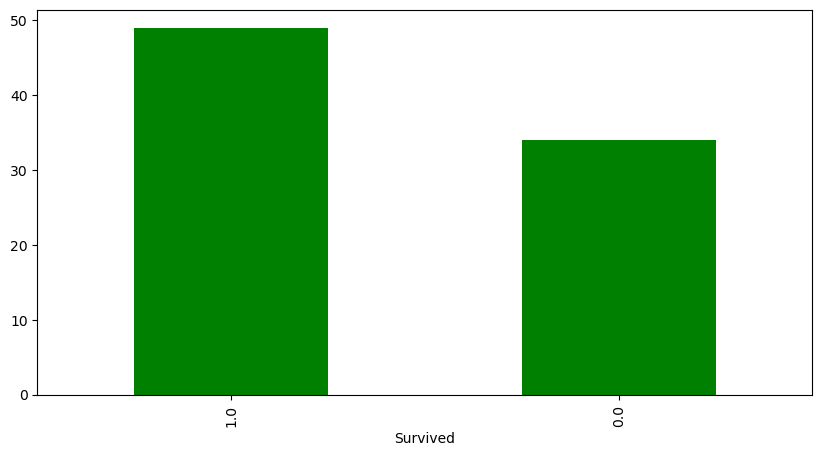

In [91]:
df_AG= df_titanic.groupby("Age_Group")
df_AG.get_group("Young")["Survived"].value_counts().plot(kind="bar",color="green")
plt.show()

<Axes: xlabel='Survived,Sex'>

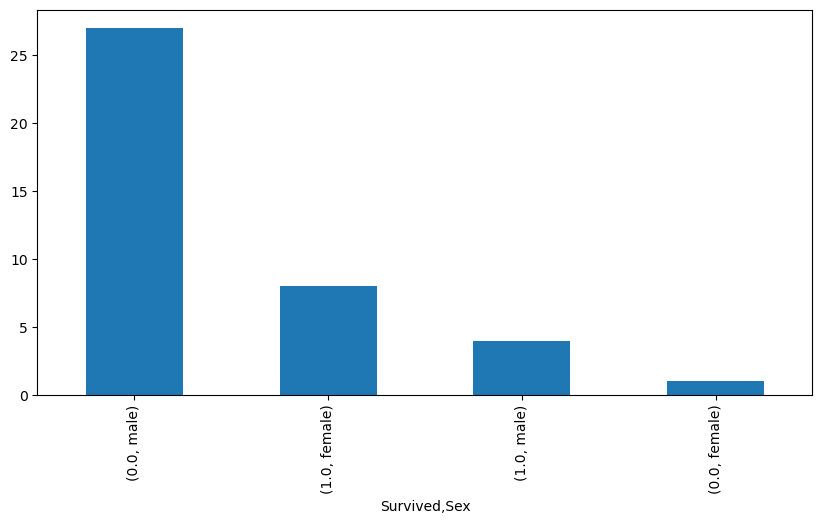

In [92]:
df_AG.get_group("Adult-Old")[["Survived","Sex"]].value_counts().plot(kind="bar")

# Pandas Profiling

In [93]:
# !pip install ydata-profiling

In [94]:
#from ydata_profiling import ProfileReport

In [95]:
#profile =ProfileReport(df_titanic)
#profile

In [96]:
df_titanic.shape

(1309, 12)

# AutoViz

In [97]:
# pip install AutoViz

In [98]:
#df_titanic.to_csv("titanic_viz.csv")

In [99]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV=AutoViz_Class()

In [100]:
#AV.AutoViz("titanic_viz.csv")

## Droping the columns 

In [101]:
df_titanic.columns

Index(['Age', 'Fare', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Embarked', 'Age_Group'],
      dtype='object')

In [102]:
df_titanicNew= df_titanic.drop(["PassengerId","Name","Ticket"],axis=1)

In [103]:
df_titanicNew.head()

Age     Fare Survived  Pclass     Sex  SibSp  Parch Embarked     Age_Group
0  22.0   7.2500      0.0       3    male      1      0        S   Adult-Young
1  38.0  71.2833      1.0       1  female      1      0        C  Adult_Middle
2  26.0   7.9250      1.0       3  female      0      0        S   Adult-Young
3  35.0  53.1000      1.0       1  female      1      0        S   Adult-Young
4  35.0   8.0500      0.0       3    male      0      0        S   Adult-Young

In [104]:
print("Training Data",train.shape)
print("Testing Data",test.shape)


Training Data (891, 12)
Testing Data (418, 11)


In [105]:
df_train=df_titanicNew.iloc[0:train.shape[0],]
df_train.shape

(891, 9)

In [106]:
df_test=df_titanicNew.iloc[train.shape[0] :,]
df_test.shape

(418, 9)

In [107]:
df_test.drop("Survived",axis=1,inplace=True)

In [108]:
df_test.shape

(418, 8)

In [109]:
df_train.dtypes

Age           float64
Fare          float64
Survived       object
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Embarked       object
Age_Group    category
dtype: object

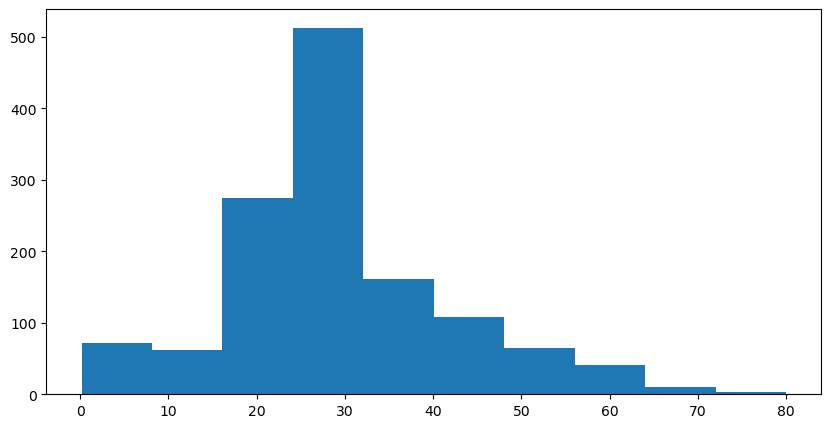

In [110]:
plt.hist(x=df_titanic["Age"])
plt.show()

In [111]:
df_train_num=df_train.select_dtypes(np.number)
df_train_num.columns

Index(['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [112]:
# Correlation

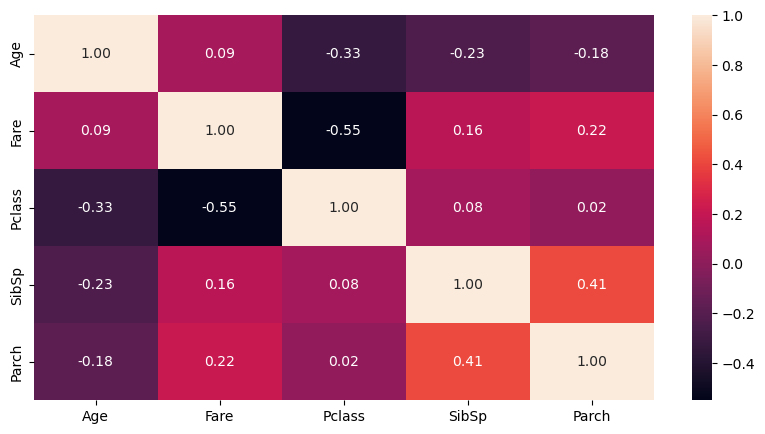

In [113]:
sns.heatmap(df_train_num.corr(),annot=True,fmt='.2f');

In [114]:
import scipy.stats as st

In [115]:
cor_test = ['Age','Fare']
for i in cor_test:
    teststats,pvalue = st.pearsonr(df_train[i],df_train['Survived'].astype(int))
    print('Pvalue is',pvalue)

Pvalue is 0.03583829987115351
Pvalue is 6.120189341922155e-15


In [116]:
st.chi2_contingency(pd.crosstab(df_train["Pclass"],df_train["Survived"]))

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [117]:
chi_test=["Pclass","Sex","SibSp","Parch","Embarked","Age_Group"]
for i in chi_test:
    tetsstats,pvalue,dof,expected_freq = st.chi2_contingency(pd.crosstab(df_train[i],df_train["Survived"]))
    print("Pvalue is",pvalue)

Pvalue is 4.549251711298793e-23
Pvalue is 1.1973570627755645e-58
Pvalue is 1.5585810465902147e-06
Pvalue is 9.703526421039997e-05
Pvalue is 2.3008626481449577e-06
Pvalue is 0.0009955378235861937


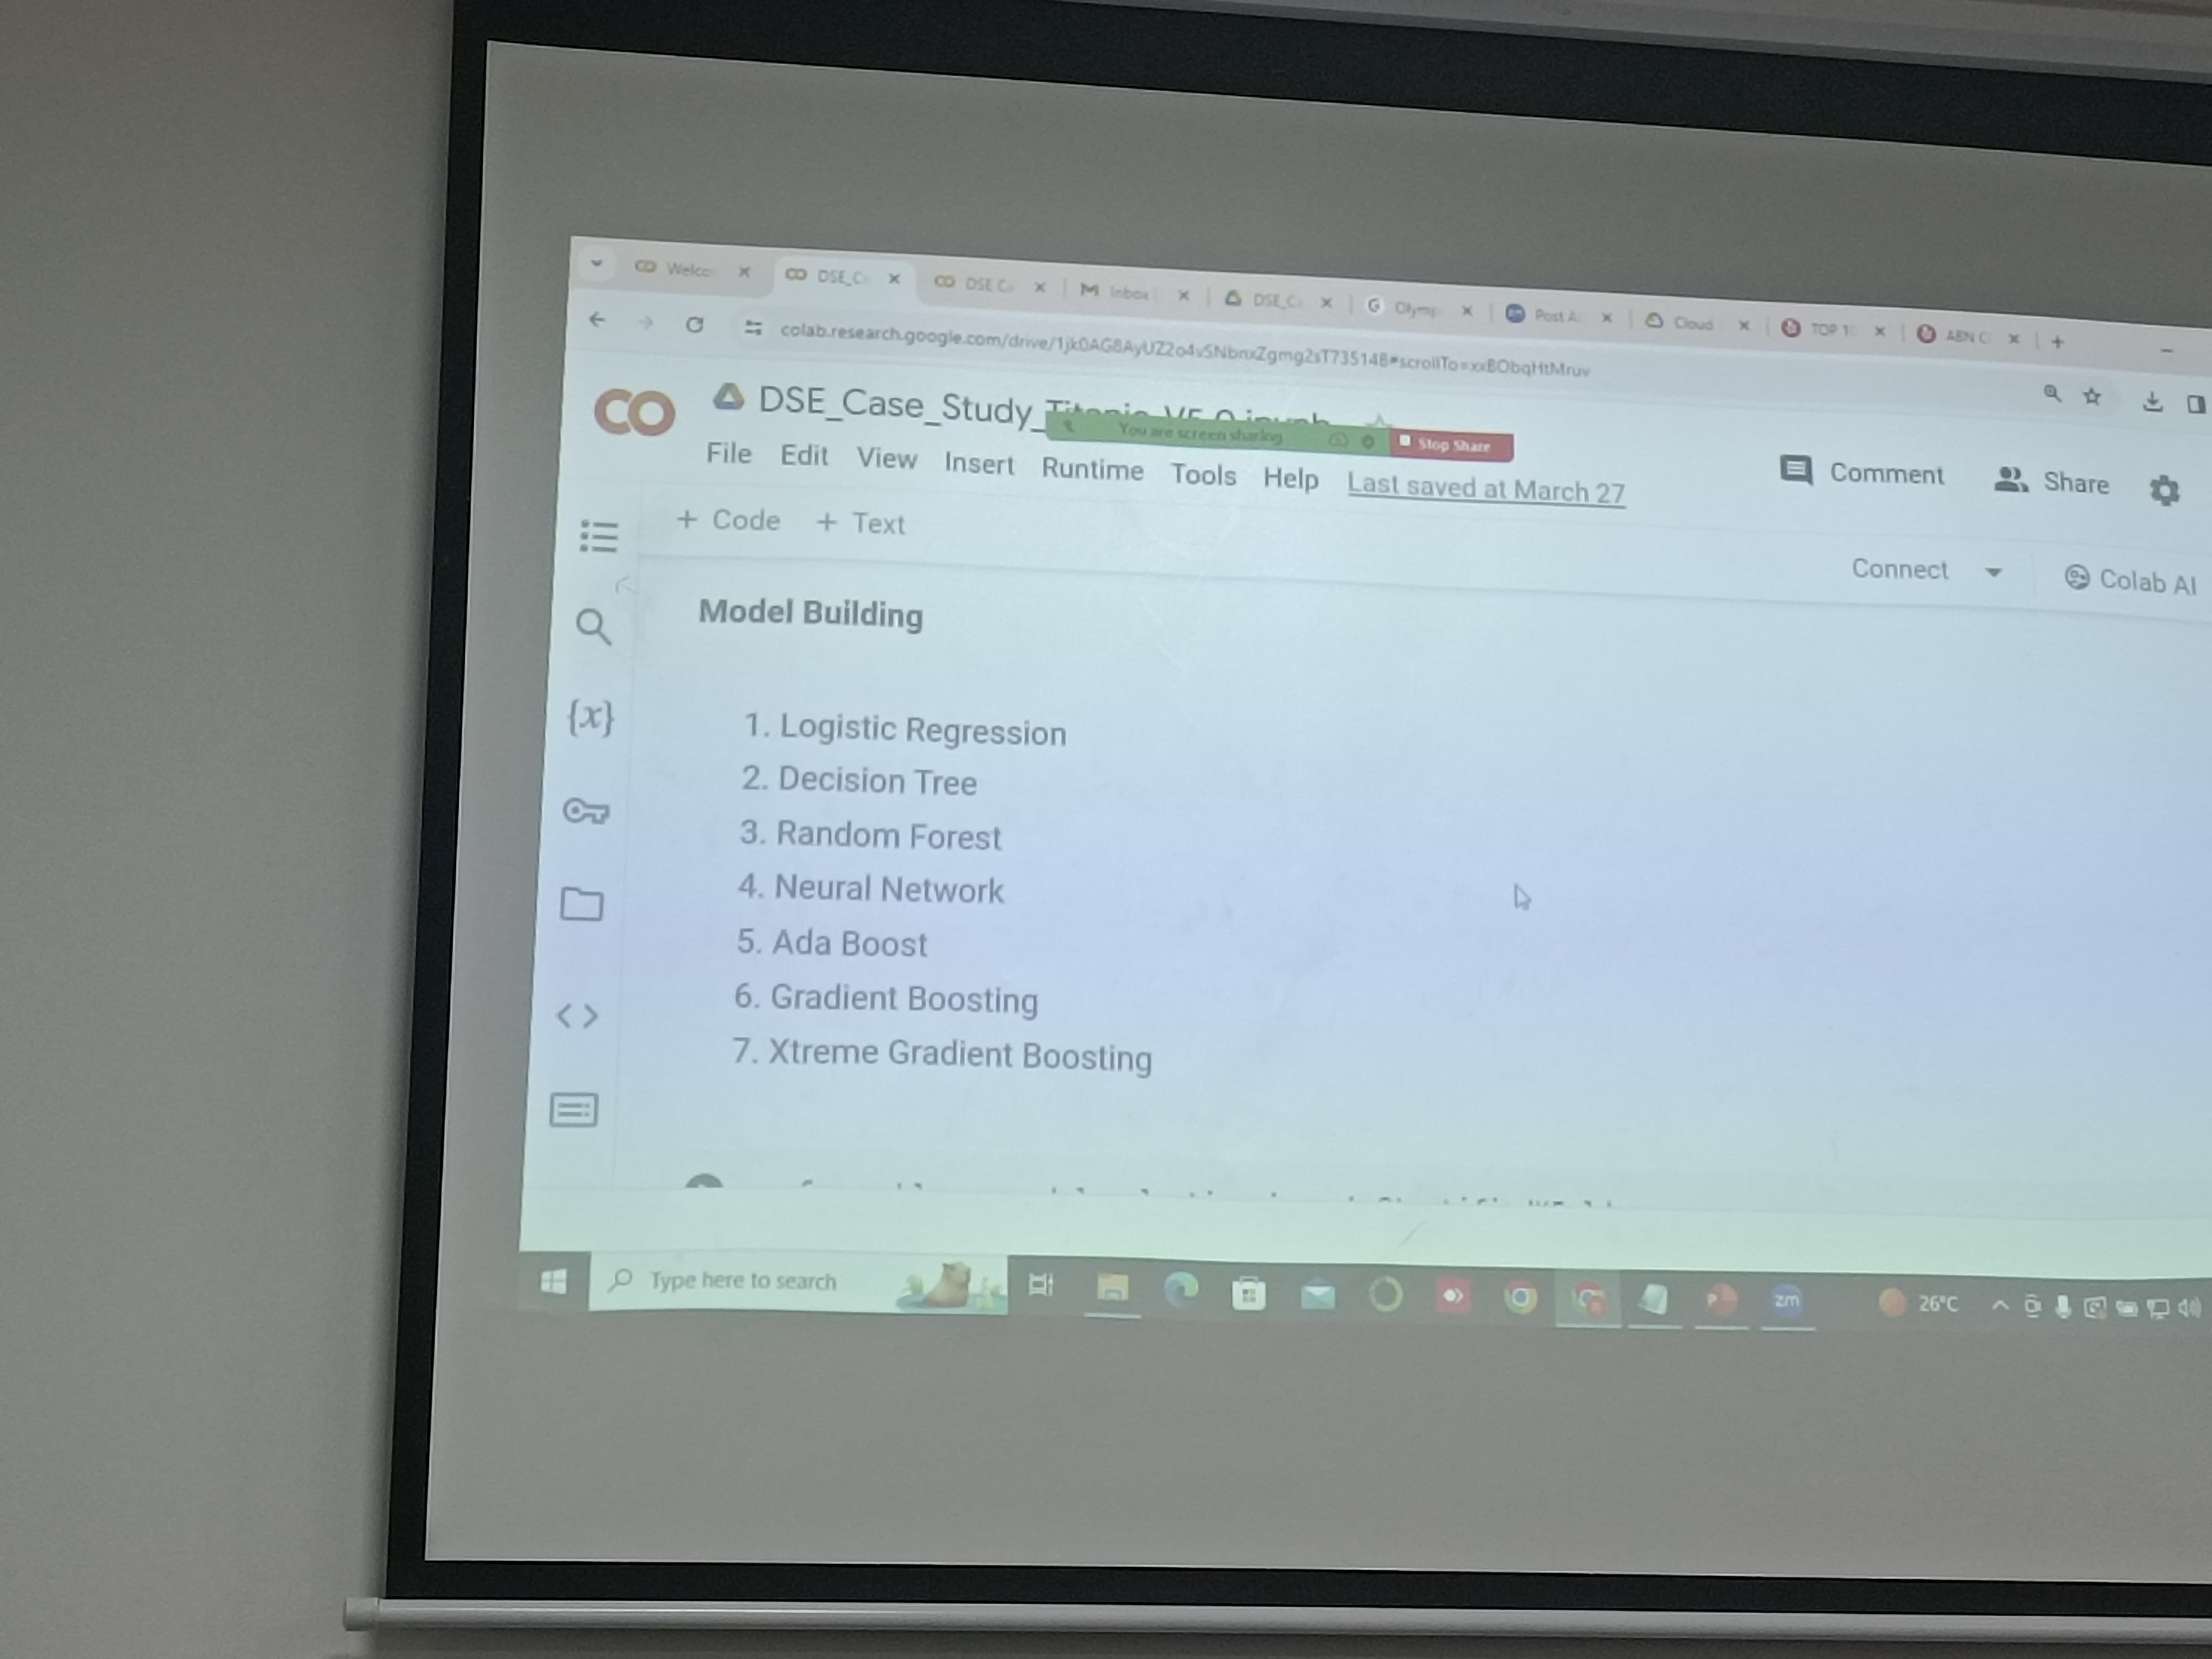

In [118]:
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

In [119]:
df_train["Survived"]=df_train["Survived"].astype(int)

In [120]:
X=df_train.drop("Survived",axis=1)
y=df_train["Survived"]

In [121]:
X.head()

Age     Fare  Pclass     Sex  SibSp  Parch Embarked     Age_Group
0  22.0   7.2500       3    male      1      0        S   Adult-Young
1  38.0  71.2833       1  female      1      0        C  Adult_Middle
2  26.0   7.9250       3  female      0      0        S   Adult-Young
3  35.0  53.1000       1  female      1      0        S   Adult-Young
4  35.0   8.0500       3    male      0      0        S   Adult-Young

In [122]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

# Neural Network( Black Box)

In [123]:
## Scaling

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
X.dtypes

Age           float64
Fare          float64
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Embarked       object
Age_Group    category
dtype: object

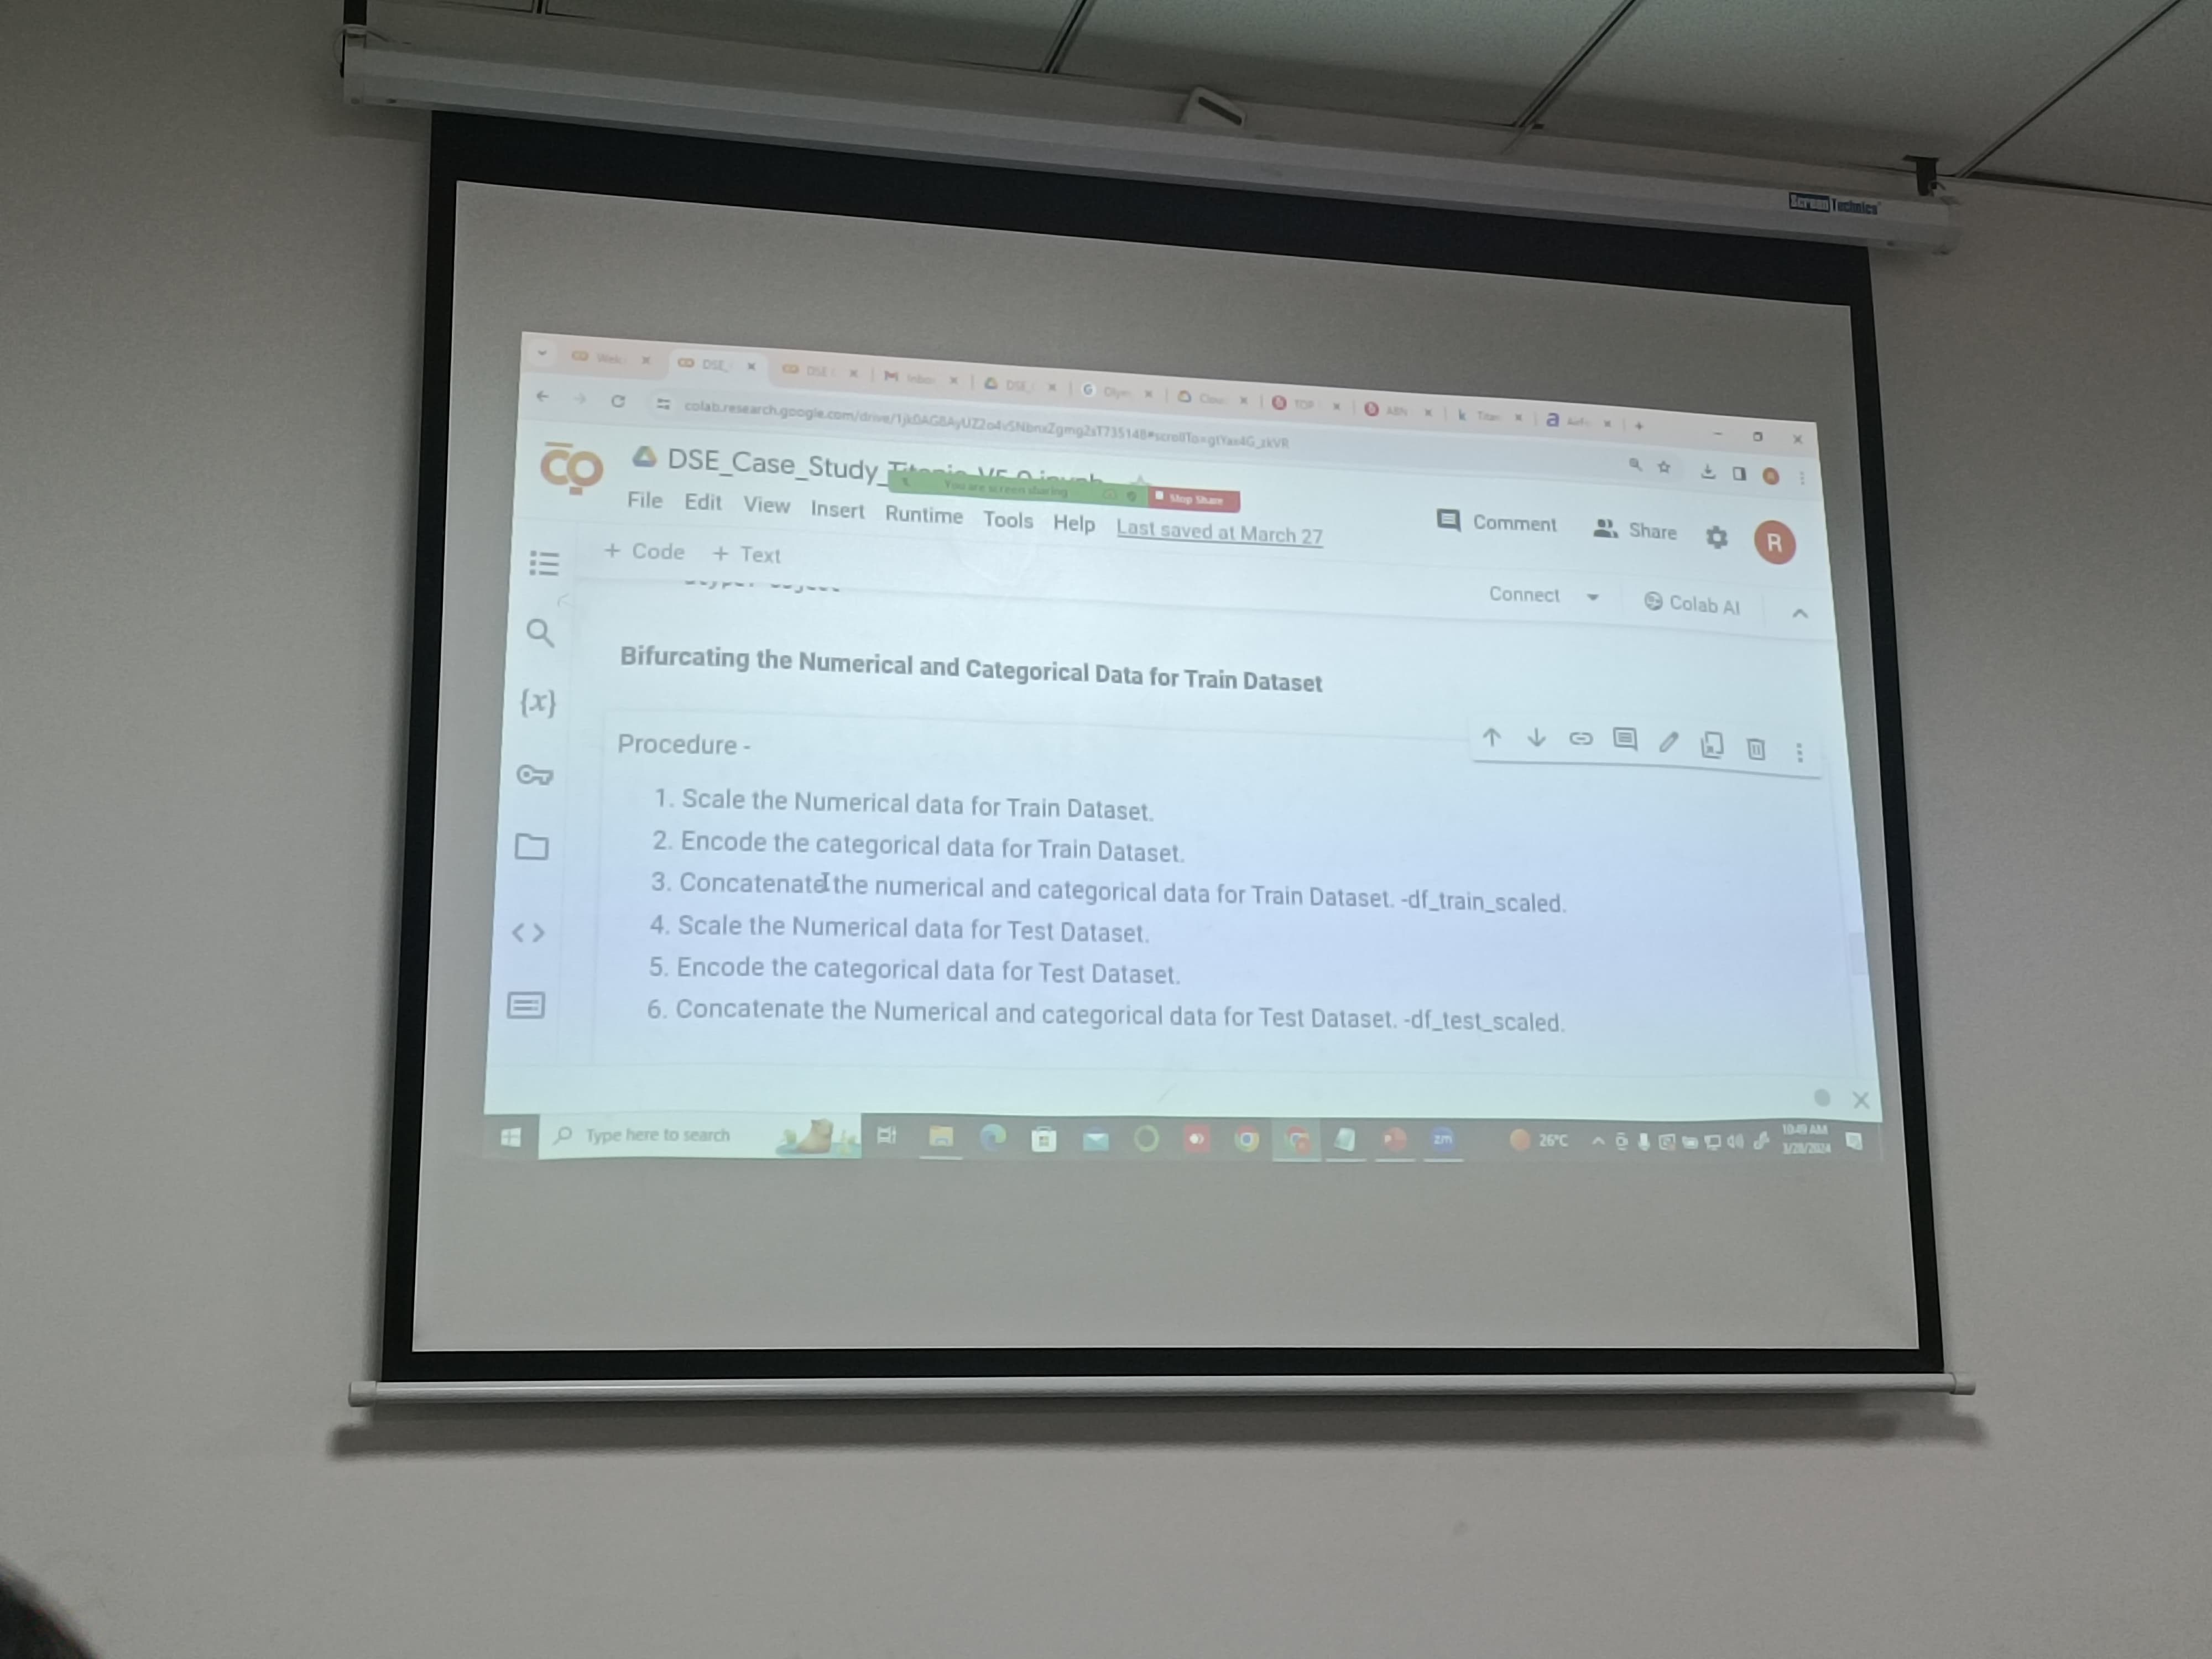

In [126]:
num_data =X[["Age","Fare"]]
cat_data =X[["Pclass","Sex","SibSp","Parch","Embarked","Age_Group"]]


In [127]:
ss=StandardScaler()
num_scaled=ss.fit_transform(num_data)
num_scaled=pd.DataFrame(num_scaled,columns=num_data.columns)

In [128]:
cat_dummy=pd.get_dummies(cat_data,drop_first=True).astype(int)
cat_dummy.head()

Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Age_Group_Teenager  \
0       3      1      0         1           0           1                   0   
1       1      1      0         0           0           0                   0   
2       3      0      0         0           0           1                   0   
3       1      1      0         0           0           1                   0   
4       3      0      0         1           0           1                   0   

   Age_Group_Adult-Young  Age_Group_Adult_Middle  Age_Group_Adult-Old  
0                      1                       0                    0  
1                      0                       1                    0  
2                      1                       0                    0  
3                      1                       0                    0  
4                      1                       0                    0

In [129]:
# To avoid multicollinearity we do drop first 

In [130]:
X_scaled=pd.concat([num_scaled,cat_dummy],axis=1)
X_scaled.head()

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0 -0.595254 -0.502445       3      1      0         1           0           1   
1  0.635996  0.786845       1      1      0         0           0           0   
2 -0.287441 -0.488854       3      0      0         0           0           1   
3  0.405137  0.420730       1      1      0         0           0           1   
4  0.405137 -0.486337       3      0      0         1           0           1   

   Age_Group_Teenager  Age_Group_Adult-Young  Age_Group_Adult_Middle  \
0                   0                      1                       0   
1                   0                      0                       1   
2                   0                      1                       0   
3                   0                      1                       0   
4                   0                      1                       0   

   Age_Group_Adult-Old  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [131]:
num_data_test=df_test[["Age","Fare"]]
cat_data_test=df_test[["Pclass","Sex","SibSp","Parch","Embarked","Age_Group"]]


In [132]:
num_data_test.shape

(418, 2)

In [133]:
num_scaled_test =ss.transform(num_data_test)
num_scaled_test=pd.DataFrame(num_scaled_test,columns=num_data_test.columns)

In [134]:
num_scaled_test

Age      Fare
0    0.366660 -0.490783
1    1.328575 -0.507479
2    2.482872 -0.453367
3   -0.210488 -0.474005
4   -0.595254 -0.401017
..        ...       ...
413  0.011224 -0.486337
414  0.712950  1.544246
415  0.674473 -0.502445
416  0.011224 -0.486337
417  0.011224 -0.198244

[418 rows x 2 columns]

In [135]:
cat_dummy_test=pd.get_dummies(cat_data_test,drop_first=True).astype(int)
cat_dummy_test.head()

Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
891       3      0      0         1           1           0   
892       3      1      0         0           0           1   
893       2      0      0         1           1           0   
894       3      0      0         1           0           1   
895       3      1      1         0           0           1   

     Age_Group_Teenager  Age_Group_Adult-Young  Age_Group_Adult_Middle  \
891                   0                      1                       0   
892                   0                      0                       1   
893                   0                      0                       0   
894                   0                      1                       0   
895                   0                      1                       0   

     Age_Group_Adult-Old  
891                    0  
892                    0  
893                    1  
894                    0  
895                    0

In [136]:
cat_dummy_test.reset_index(inplace=True,drop=True)

In [138]:
df_test_sacled=pd.concat([num_scaled_test,cat_dummy_test],axis=1)
df_test_sacled.head()

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0  0.366660 -0.490783       3      0      0         1           1           0   
1  1.328575 -0.507479       3      1      0         0           0           1   
2  2.482872 -0.453367       2      0      0         1           1           0   
3 -0.210488 -0.474005       3      0      0         1           0           1   
4 -0.595254 -0.401017       3      1      1         0           0           1   

   Age_Group_Teenager  Age_Group_Adult-Young  Age_Group_Adult_Middle  \
0                   0                      1                       0   
1                   0                      0                       1   
2                   0                      0                       0   
3                   0                      1                       0   
4                   0                      1                       0   

   Age_Group_Adult-Old  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0

In [140]:
X=pd.get_dummies(X,drop_first=True).astype(int)

In [142]:
X.head()

Age  Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0   22     7       3      1      0         1           0           1   
1   38    71       1      1      0         0           0           0   
2   26     7       3      0      0         0           0           1   
3   35    53       1      1      0         0           0           1   
4   35     8       3      0      0         1           0           1   

   Age_Group_Teenager  Age_Group_Adult-Young  Age_Group_Adult_Middle  \
0                   0                      1                       0   
1                   0                      0                       1   
2                   0                      1                       0   
3                   0                      1                       0   
4                   0                      1                       0   

   Age_Group_Adult-Old  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [144]:
X.shape

(891, 12)

In [146]:
df_test.head()

Age     Fare  Pclass     Sex  SibSp  Parch Embarked     Age_Group
891  34.5   7.8292       3    male      0      0        Q   Adult-Young
892  47.0   7.0000       3  female      1      0        S  Adult_Middle
893  62.0   9.6875       2    male      0      0        Q     Adult-Old
894  27.0   8.6625       3    male      0      0        S   Adult-Young
895  22.0  12.2875       3  female      1      1        S   Adult-Young

In [148]:
df_test=pd.get_dummies(df_test,drop_first=True).astype(int)
df_test.shape

(418, 12)

In [149]:
kfold =StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=0)

In [151]:
lgr=LogisticRegression()


In [154]:
y_pred=[]
for train_index,test_index in kfold.split(X,y):
    x_train =X.loc[train_index]
    y_train =y.loc[train_index]
    
    lgr.fit(x_train,y_train)
    y_pred.append(lgr.predict(df_test))

In [155]:
y_log=pd.DataFrame(y_pred).T.mode(axis=1)

In [156]:
model_prediction= pd.DataFrame({"PassengerId":test.PassengerId,
                               "Survived":test.Sex})
model_prediction

PassengerId Survived
0            892     male
1            893   female
2            894     male
3            895     male
4            896   female
..           ...      ...
413         1305     male
414         1306   female
415         1307     male
416         1308     male
417         1309     male

[418 rows x 2 columns]

In [158]:
model_prediction["Survived"]=y_log

In [159]:
model_prediction.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [160]:
model_prediction.to_csv("LogisticReg.csv",index=False)

# DecisionTree

In [162]:
dt=DecisionTreeClassifier()
y_pred=[]
for train_index,test_index in kfold.split(X,y):
    x_train =X.loc[train_index]
    y_train =y.loc[train_index]
    
    dt.fit(x_train,y_train)
    y_pred.append(dt.predict(df_test))

In [164]:
y_dt=pd.DataFrame(y_pred).T.mode(axis=1)

In [165]:
model_prediction['Survived']=y_dt
model_prediction.to_csv('DecisionTree.csv',index=False)

# RandomForestClassifier

In [166]:
rf=RandomForestClassifier()
y_pred=[]
for train_index,test_index in kfold.split(X,y):
    x_train =X.loc[train_index]
    y_train =y.loc[train_index]
    
    rf.fit(x_train,y_train)
    y_pred.append(rf.predict(df_test))

In [168]:
y_rf=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_rf
model_prediction.to_csv('RandomForest.csv',index=False)

In [167]:
import os
os.getcwd()

'C:\\Users\\kaish'

In [169]:
ada=AdaBoostClassifier()
y_pred=[]
for train_index,test_index in kfold.split(X,y):
    x_train =X.loc[train_index]
    y_train =y.loc[train_index]
    
    ada.fit(x_train,y_train)
    y_pred.append(ada.predict(df_test))

In [171]:
y_ada=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_ada
model_prediction.to_csv('AdaBoost.csv',index=False)

In [172]:
import os
os.getcwd()

'C:\\Users\\kaish'

In [174]:
xgb=XGBClassifier()
y_pred=[]
for train_index,test_index in kfold.split(X,y):
    x_train =X.loc[train_index]
    y_train =y.loc[train_index]
    
    xgb.fit(x_train,y_train)
    y_pred.append(xgb.predict(df_test))

In [175]:
y_xgb=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_xgb
model_prediction.to_csv('XGBClassifier.csv',index=False)

In [177]:
gbc=GradientBoostingClassifier()
y_pred=[]
for train_index,test_index in kfold.split(X,y):
    x_train =X.loc[train_index]
    y_train =y.loc[train_index]
    
    gbc.fit(x_train,y_train)
    y_pred.append(gbc.predict(df_test))

In [178]:
y_gbc=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_gbc
model_prediction.to_csv('GradientBoosting.csv',index=False)

In [179]:
from sklearn.neural_network import MLPClassifier

In [182]:
X_scaled.head()

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0 -0.595254 -0.502445       3      1      0         1           0           1   
1  0.635996  0.786845       1      1      0         0           0           0   
2 -0.287441 -0.488854       3      0      0         0           0           1   
3  0.405137  0.420730       1      1      0         0           0           1   
4  0.405137 -0.486337       3      0      0         1           0           1   

   Age_Group_Teenager  Age_Group_Adult-Young  Age_Group_Adult_Middle  \
0                   0                      1                       0   
1                   0                      0                       1   
2                   0                      1                       0   
3                   0                      1                       0   
4                   0                      1                       0   

   Age_Group_Adult-Old  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [184]:
ANN=MLPClassifier()
y_pred=[]
for train_index,test_index in kfold.split(X_scaled,y):
    x_train =X_scaled.loc[train_index]
    y_train =y.loc[train_index]
    
    ANN.fit(x_train,y_train)
    y_pred.append(ANN.predict(df_test_sacled))

In [185]:
y_ANN=pd.DataFrame(y_pred).T.mode(axis=1)
model_prediction['Survived']=y_ANN
model_prediction.to_csv('MLP.csv',index=False)